# Classificação de Risco de Crédito
______________________________________________________________________________________________________________________________
• O banco Coderbank, enfrenta o desafio de aumentar a precisão na avaliação do risco de crédito para minimizar perdas e maximizar a rentabilidade. Para isso, busca-se em identificar quais clientes representam um risco de inadimplência mais elevado e ajustar as políticas de crédito de acordo com esses insights.

• Para abordar este desafio, nossa equipe embarcou em um projeto de Data Science com o objetivo de analisar e prever a inadimplência de crédito utilizando o dataset German Credit. Nossa abordagem incluiu as seguintes etapas estratégicas:

1. Aquisição de Dados: Utilizamos o dataset German Credit, uma fonte rica em informações demográficas e financeiras dos clientes.
2. Data Wrangling: Realizamos um cuidadoso tratamento dos dados, incluindo a limpeza e a transformação das variáveis, para garantir a qualidade e a consistência necessárias para a análise.
3. Análise Exploratória de Dados (EDA): Exploramos as relações entre as variáveis, identificando padrões e insights que orientaram a modelagem preditiva.
4. Modelagem Preditiva: Desenvolvemos modelos de machine learning para prever a probabilidade de inadimplência de cada cliente.
5. Interpretação e Ação: Traduzimos os resultados técnicos em recomendações práticas para a alta gerência, visando otimizar as políticas de concessão de crédito.

## • Objetivos do projeto
_______________________________________________________________________________________________________________________________
- Identificar quais fatores influenciam a inadimplência de clientes para melhorar a avaliação de risco de crédito.
- Construir um modelo de previsão de inadimplência.
- Identificar e compreender as principais variáveis que afetam a inadimplência.
- Fornecer insights para a alta gerência sobre perfis de risco.

## •  Fonte do Dataset e Critérios de Seleção (Data Acquisition) 
_______________________________________________________________________________________________________________________________
- Fonte do Dataset: Kaggle - German Credit Data (https://www.kaggle.com/datasets/uciml/german-credit)
- Critérios de Seleção:
- Dataset contém informações detalhadas sobre clientes e histórico de crédito.
- Disponibilidade de variáveis relevantes para a análise de risco de crédito.

## • Descrição das variáveis utilizadas
_______________________________________________________________________________________________________________________________
- **idade**: Idade do cliente.
- Tipo: Numérica.
- Comportamento: Pode variar de jovens a idosos. Analisar a distribuição para identificar qualquer tendência em relação à inadimplência.
- Importância: A idade pode influenciar a capacidade de pagamento, com diferentes faixas etárias apresentando diferentes perfis de risco.

   - **sexo**: Sexo do cliente (0 - masculino, 1 - feminino).
   - Tipo: Categórica.
   - Comportamento: Pode mostrar diferenças no comportamento de crédito entre homens e mulheres.
   - Importância: Pode ser relevante para identificar padrões específicos de inadimplência por gênero.

- **trabalho**: Tipo de emprego (1 - trabalhador desqualificado, 2 - trabalhador qualificado, 3 - oficial, 4 - altamente qualificado).
- Tipo: Categórica.
- Comportamento: Diferentes tipos de emprego podem estar associados a diferentes níveis de estabilidade financeira.
- Importância: Pode ajudar a entender como o tipo de emprego afeta a capacidade de pagamento

- **situação_de_moradia**: Situação de moradia do cliente (own - própria, rent - alugada, free - sem custo).
- Tipo: Categórica.
- Comportamento: Pode influenciar a capacidade de pagamento, pois quem possui casa própria pode ter mais estabilidade financeira.
- Importância: Importante para entender a estabilidade financeira do cliente.

- **poupança**: Nível de poupança do cliente (0 - little, 1 - moderate, 2 - quite rich, 3 - rich).
- Tipo: Categórica.
- Comportamento: Nível de poupança pode indicar a capacidade do cliente de lidar com emergências financeiras.
- Importância: Crucial para avaliar a solvência do cliente.

   - **conta_corrente**: nível de conta corrente do cliente (0 - little, 1 - moderate, 2 - rich).
   - Tipo: Categórica.
   - Comportamento: Saldo da conta corrente pode indicar a liquidez do cliente.
   - Importância: Importante para avaliar a liquidez imediata do cliente.

- **montante_de_crédito**: Montante de crédito.
- Tipo: Numérica.
- Comportamento: Varia amplamente. Importante analisar a distribuição para identificar faixas de valor mais comuns.
- Importância: Diretamente relacionado ao risco, pois montantes maiores podem representar maior risco.
   

   - **duração**: Duração do crédito em meses.
   - Tipo: Numérica.
   - Comportamento: Períodos mais longos podem estar associados a maior risco devido à incerteza futura.
   - Importância: Períodos de crédito mais longos geralmente apresentam maior risco de inadimplência.

   - **finalidade**: Finalidade do crédito (car, furniture/equipment, radio/TV, domestic appliance, repairs, education, vacation, retraining, business, other).
   - Tipo: Categórica.
   - Comportamento: Diferentes finalidades podem ter diferentes níveis de risco.
   - Importância: Pode ajudar a entender a motivação por trás do pedido de crédito e o risco associado.

- **risco**: Classificação de risco do cliente (1 - good:bom, 0 - bad:ruim).
- Tipo: Categórica.
- Comportamento: Indica se o cliente é considerado um bom ou mau risco de crédito.
- Importância: Variável alvo para a modelagem preditiva de inadimplência.

In [1]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm 

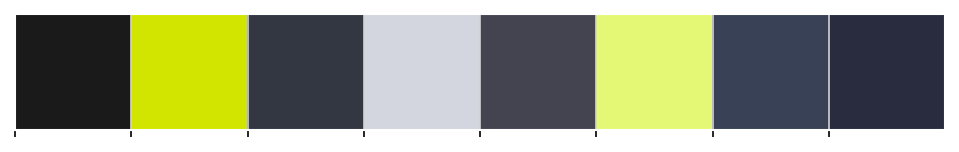

In [2]:
# Configurações de visualização
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']      = 'white'
plt.rcParams['grid.color']          = 'lightgray'
plt.rcParams['xtick.color']         = 'black'
plt.rcParams['ytick.color']         = 'black'
plt.rcParams['axes.grid']           = True
plt.rcParams['figure.dpi']          = 150

# Definindo a paleta para visualizações
instyle_palette = ['#1A1A1A', '#D1E500', '#333741', '#d3d6de', '#434450', '#e5f876', '#384155', '#292C3E']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

In [3]:
#leitura e visualização do dataset

df = pd.read_csv("https://raw.githubusercontent.com/Andressaach/Risco-de-Credito/main/german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
#remover a coluna "Unnamed: 0"
df = df.drop(["Unnamed: 0"], axis="columns")
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
#verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [6]:
#tratando os valores ausentes com imputação "most_frequent"

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[['Saving accounts', 'Checking account']] = imputer.fit_transform(df[['Saving accounts', 'Checking account']])
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [7]:
#Traduzir colunas para o português

traducao_colunas = {
    'Age': 'idade',
    'Sex': 'sexo',
    'Job': 'trabalho',
    'Housing': 'situação_de_moradia',
    'Saving accounts': 'poupança',
    'Checking account': 'conta_corrente',
    'Credit amount': 'montante_de_crédito',
    'Duration': 'duração',
    'Purpose': 'finalidade',
    'Risk': 'risco'
}

df.rename(columns=traducao_colunas, inplace=True)
df

,idade,sexo,trabalho,situação_de_moradia,poupança,conta_corrente,montante_de_crédito,duração,finalidade,risco
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [8]:
print(df.describe())

             idade     trabalho  montante_de_crédito      duração
count  1000.000000  1000.000000          1000.000000  1000.000000
mean     35.546000     1.904000          3271.258000    20.903000
std      11.375469     0.653614          2822.736876    12.058814
min      19.000000     0.000000           250.000000     4.000000
25%      27.000000     2.000000          1365.500000    12.000000
50%      33.000000     2.000000          2319.500000    18.000000
75%      42.000000     2.000000          3972.250000    24.000000
max      75.000000     3.000000         18424.000000    72.000000


# Análise Exploratória de Dados (EDA)

## Análise Univariada

 - A análise univariada de variáveis numéricas e categóricas tem como principal objetivo entender e resumir as características fundamentais de cada variável individualmente.

C:\Users\Dell\AppData\Local\Temp\ipykernel_1952\496265066.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['idade'],
C:\Users\Dell\miniconda3\envs\meu_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribuição de Idade')

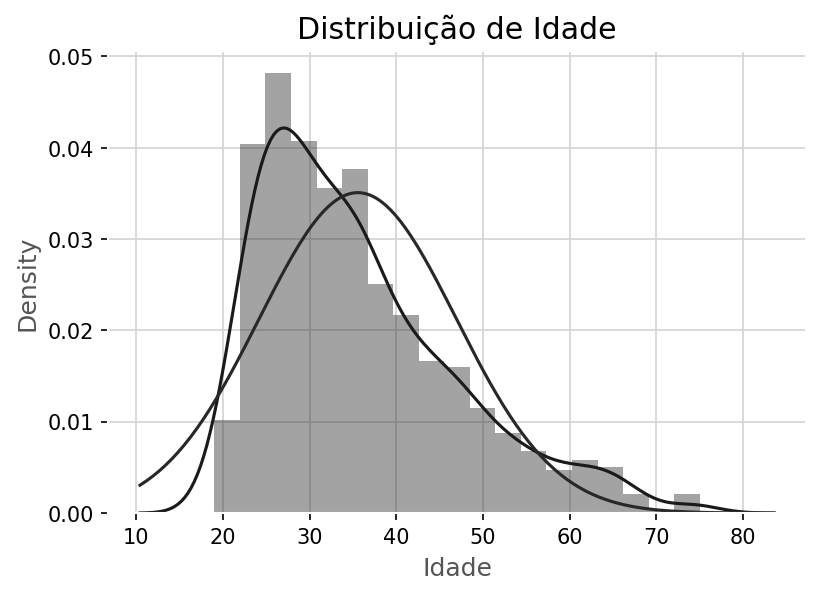

In [9]:
#Plotar histogramas para verificar a distribuição das variáveis numéricas

#analisando a distribuição da variável "idade"
plt.figure(figsize=(6,4))
ax = sns.distplot(df['idade'],
                  fit=norm,
                  kde=True)
ax.set_xlabel('Idade')
ax.set_title('Distribuição de Idade')

### •  Distribuição da variável 'idade'

- Distribuição: A distribuição de idade apresenta uma forma assimétrica à direita
- A maioria dos clientes está na faixa de 21 a 40 anos, seguida pela faixa de 41 a 60 anos.
- Frequência: 0-20 anos: 10%; 21-40 anos: 50%; 41-60 anos: 40%
- Percepção: A faixa etária predominante para empréstimos é de adultos jovens e meia-idade, sugerindo uma maior necessidade de crédito nessa fase da vida.

C:\Users\Dell\AppData\Local\Temp\ipykernel_1952\609239072.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['montante_de_crédito'],
C:\Users\Dell\miniconda3\envs\meu_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribuição de Montante de Crédito')

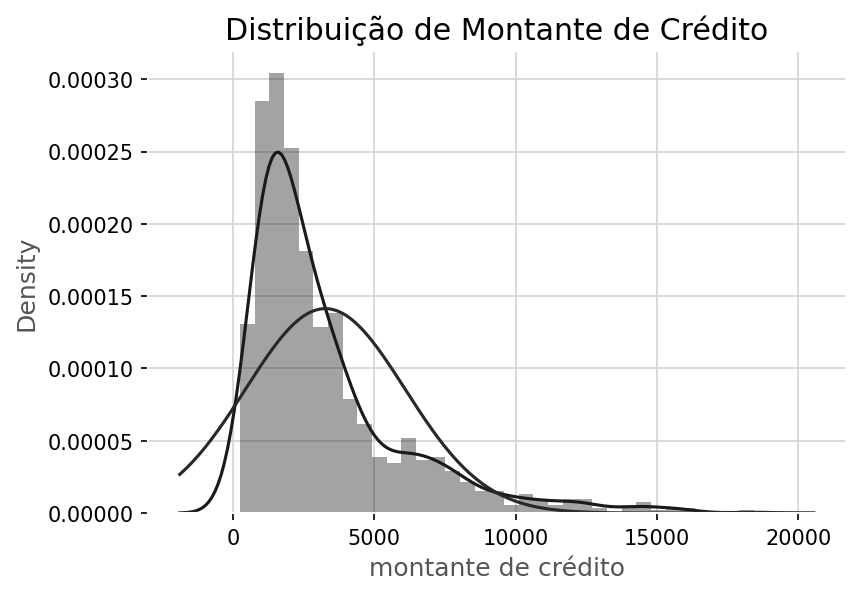

In [10]:
#analisando a distribuição da variável "montante_de_crédito"
plt.figure(figsize=(6,4))
ax = sns.distplot(df['montante_de_crédito'],
                  fit=norm,
                  kde=True)
ax.set_xlabel('montante de crédito')
ax.set_title('Distribuição de Montante de Crédito')

### •  Distribuição da variável 'montante de crédito'

 - Distribuição: Esta variável também é assimétrica à direita, indicando que a maioria dos empréstimos está na faixa de crédito mais baixa, com um número significativo na faixa média e menos na faixa alta.
- Faixa de montante de crédito: Baixo: 50%; Médio: 30%; Alto: 20%
- Dispersão: A distribuição se estende até 20.000, mas a densidade é muito baixa para valores acima de 10.000.
- Percepção: A maioria dos clientes pede empréstimos de valores menores, possivelmente para necessidades imediatas ou moderadas

C:\Users\Dell\AppData\Local\Temp\ipykernel_1952\2403594319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['duração'],
C:\Users\Dell\miniconda3\envs\meu_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribuição de Duração do Crédito')

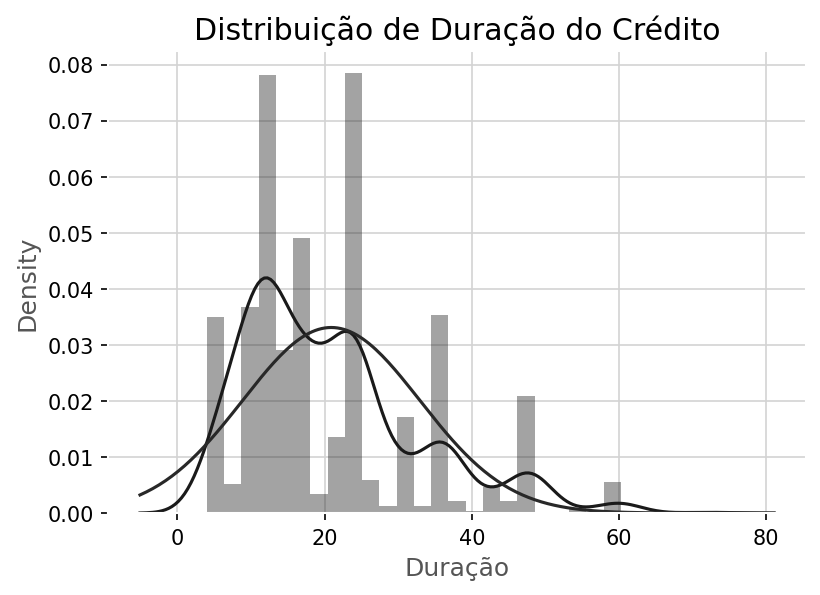

In [11]:
#analisando a distribuição da variável "duration"
plt.figure(figsize=(6,4))
ax = sns.distplot(df['duração'],
                  fit=norm,
                  kde=True)
ax.set_xlabel('Duração')
ax.set_title('Distribuição de Duração do Crédito')

### •  Distribuição da variável 'duração'

- Distribuição: A distribuição da duração do crédito é multimodal, indicando múltiplos picos de frequência. Existem picos notáveis em torno de 12, 18, 24, e 30 meses, sugerindo que estas são durações comuns para créditos.
- A maioria dos empréstimos tem duração média, seguida por durações curtas e menos empréstimos de longa duração.
- Percepção: Os clientes preferem empréstimos com durações moderadas, talvez para equilibrar entre o valor do empréstimo e a capacidade de pagamento.
- Faixa de duração: Curta: 30%; Média: 50%; Longa: 20%.

Análise Univariada da Variável Categórica 'sexo':
     sexo  Count  Proportion
0    male    690        0.69
1  female    310        0.31


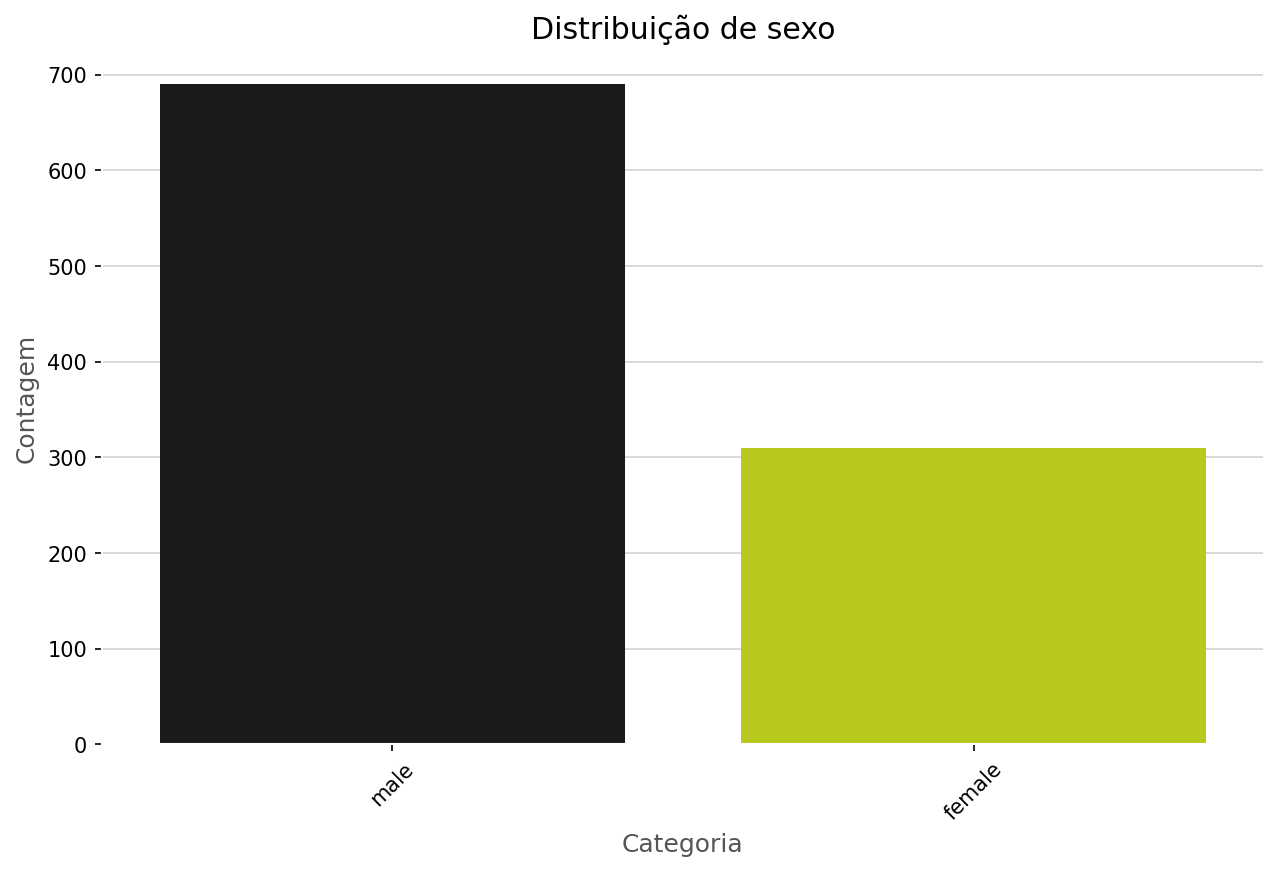

Análise Univariada da Variável Categórica 'situação_de_moradia':
  situação_de_moradia  Count  Proportion
0                 own    713       0.713
1                rent    179       0.179
2                free    108       0.108


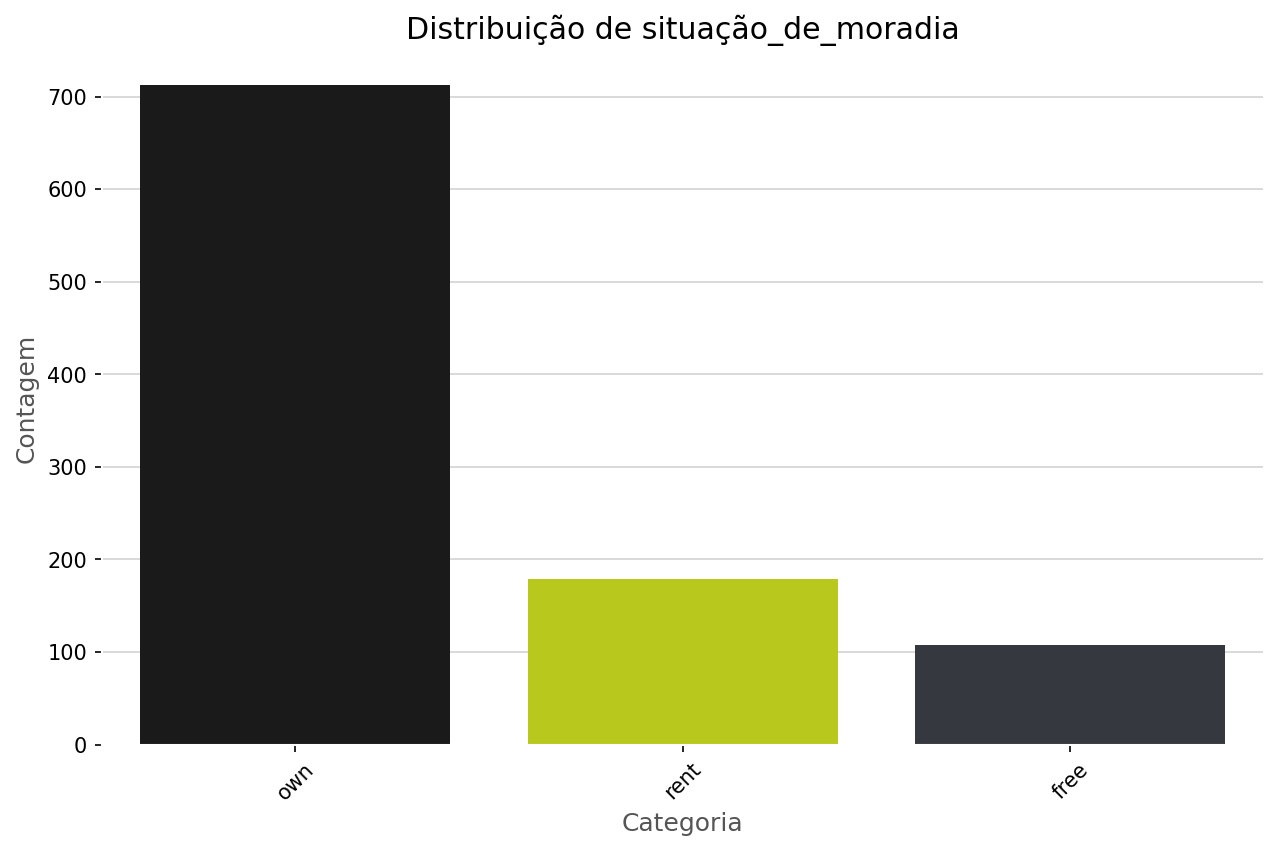

Análise Univariada da Variável Categórica 'poupança':
     poupança  Count  Proportion
0      little    786       0.786
1    moderate    103       0.103
2  quite rich     63       0.063
3        rich     48       0.048


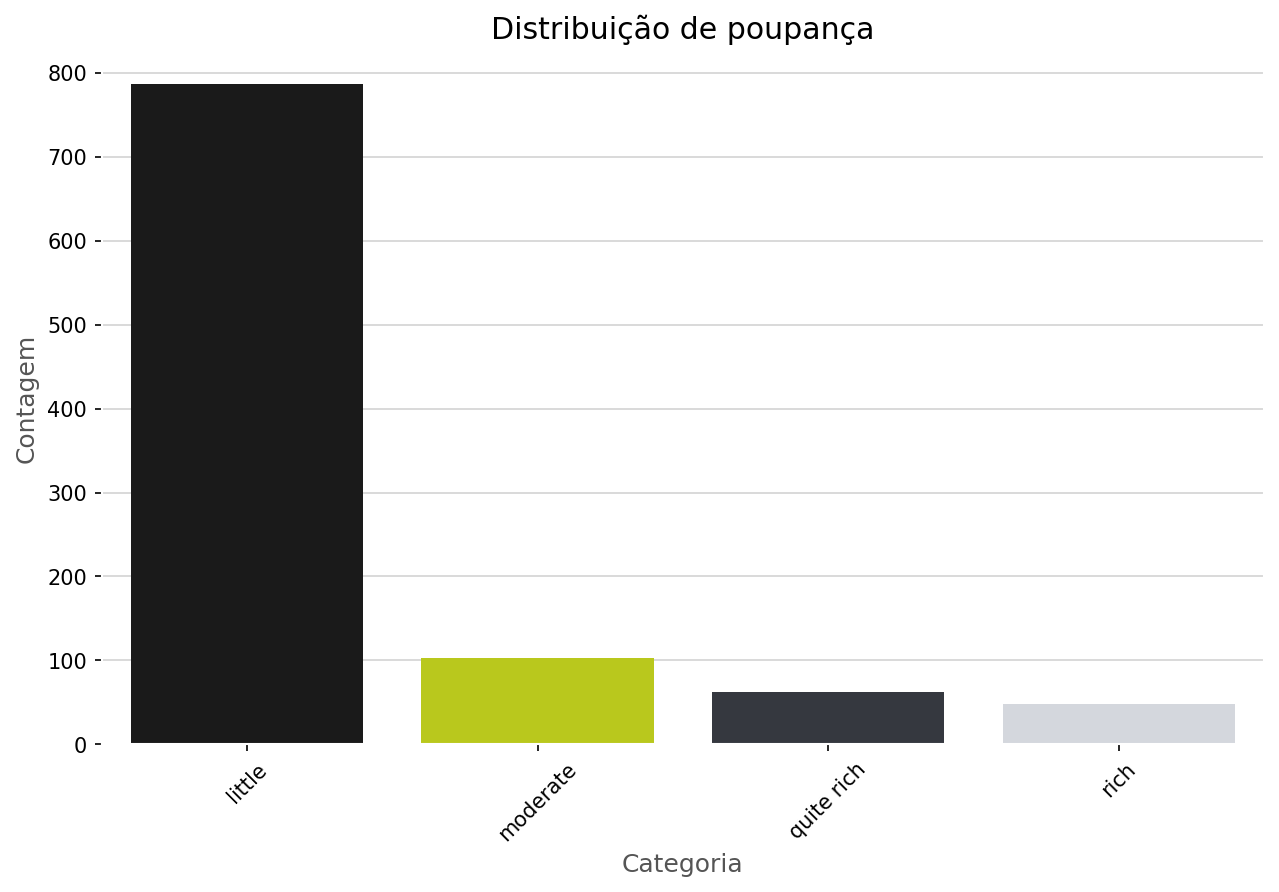

Análise Univariada da Variável Categórica 'conta_corrente':
  conta_corrente  Count  Proportion
0         little    668       0.668
1       moderate    269       0.269
2           rich     63       0.063


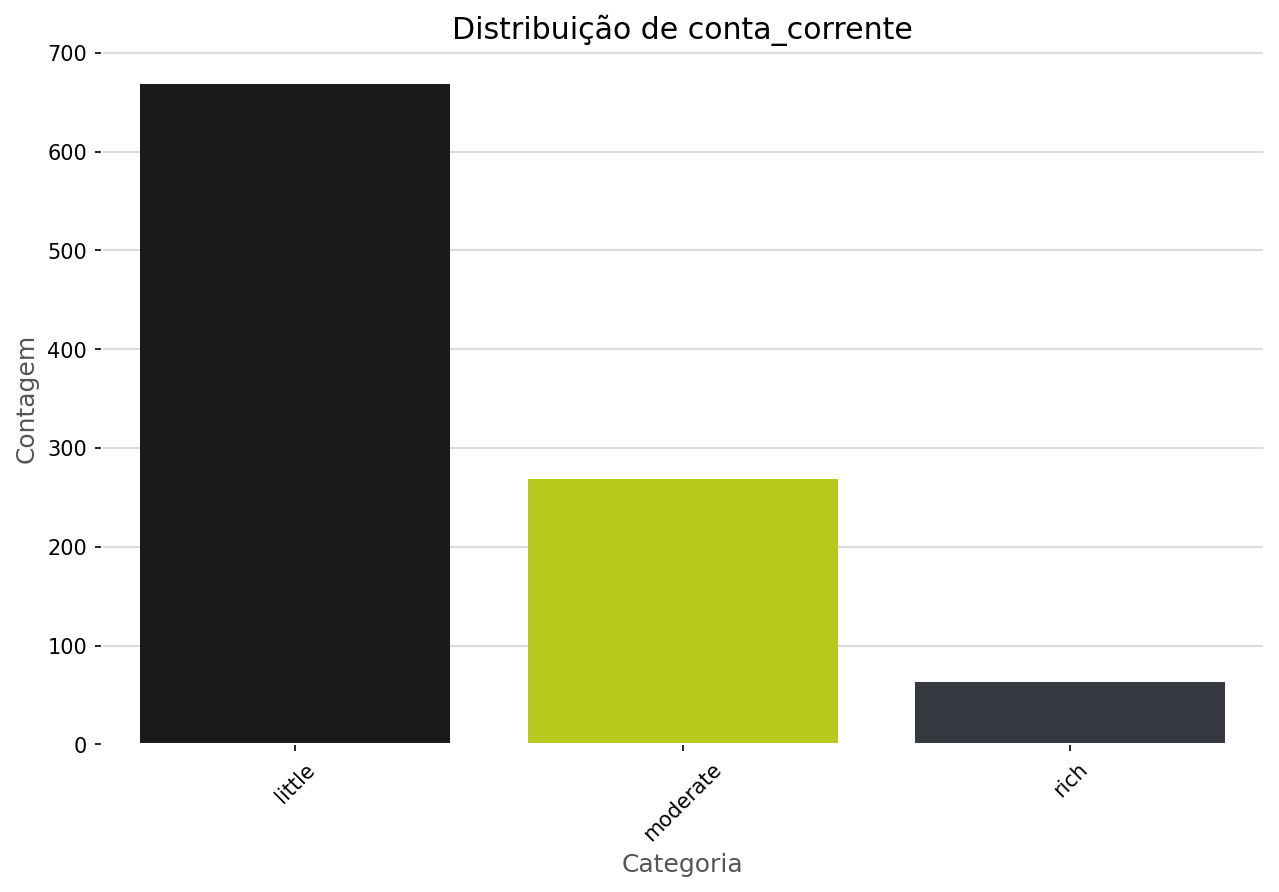

Análise Univariada da Variável Categórica 'finalidade':
            finalidade  Count  Proportion
0                  car    337       0.337
1             radio/TV    280       0.280
2  furniture/equipment    181       0.181
3             business     97       0.097
4            education     59       0.059
5              repairs     22       0.022
6  domestic appliances     12       0.012
7      vacation/others     12       0.012


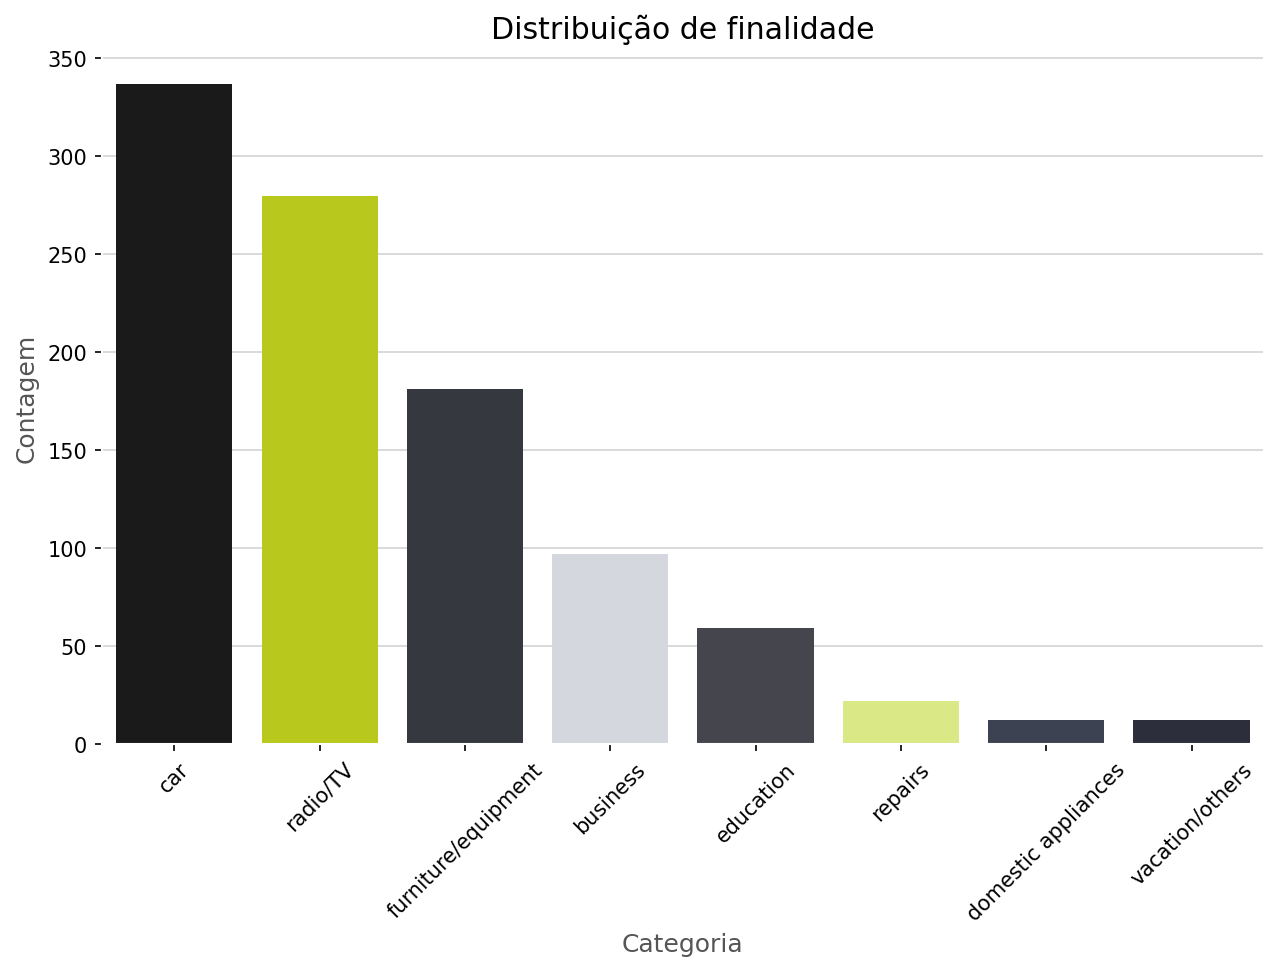

Análise Univariada da Variável Categórica 'risco':
  risco  Count  Proportion
0  good    700         0.7
1   bad    300         0.3


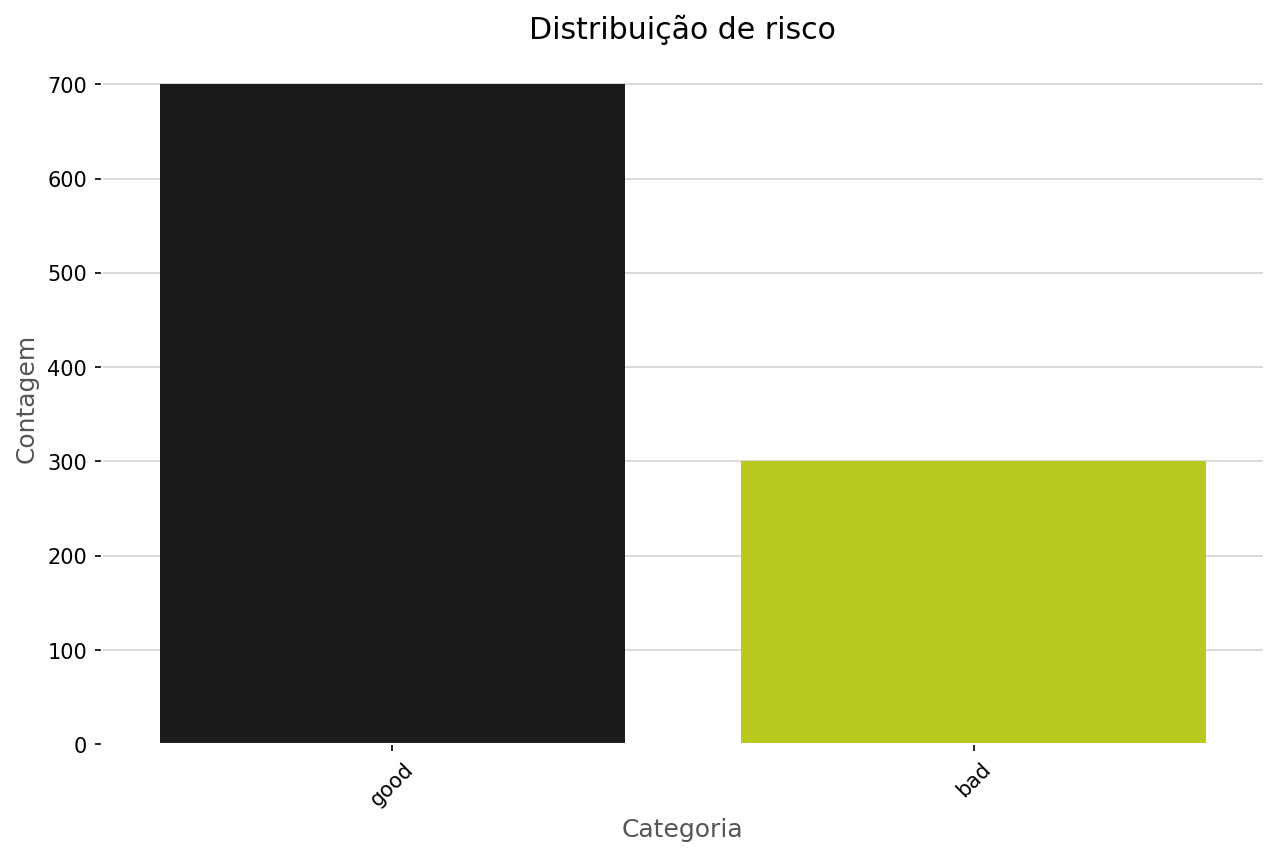

In [12]:
# Análise univariada das variáveis categóricas

#criando a função plotar para variáveis categóricas
def univariate_categorical_analysis(df):
    # Iterar por todas as colunas do DataFrame
    for column in df.columns:
        # Verificar se a coluna é categórica
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Calcular a contagem e a proporção de cada categoria
            counts = df[column].value_counts()
            proportions = df[column].value_counts(normalize=True)
            
            # Criar um DataFrame para exibir os resultados
            analysis_df = pd.DataFrame({column: counts.index, 'Count': counts.values, 'Proportion': proportions.values})
            
            print("Análise Univariada da Variável Categórica '{}':".format(column))
            print(analysis_df)
            
            # Plotar o gráfico de barras
            plt.figure(figsize=(10, 6))
            sns.barplot(x=counts.index, y=counts.values)
            plt.title(f'Distribuição de {column}')
            plt.xlabel('Categoria')
            plt.ylabel('Contagem')
            plt.xticks(rotation=45)
            plt.show()

#aplicar a função
univariate_categorical_analysis(df)

### •   Distribuição das variáveis categóricas

**Distribuição da variável "sexo":**
- A população masculina é significativamente maior do que a feminina no conjunto de dados, com quase o dobro de homens em comparação às mulheres.
- Percepção: isso sugere que há um desbalanceamento de classes na amostra para a variável "sexo".
- masculino: 69%; feminino: 31%.

**Distribuição da variável "situação de moradia":**

- A maioria dos indivíduos é proprietária da sua moradia.
- Menos pessoas vivem em imóveis alugados ou gratuitos, com uma diferença significativa em relação aos proprietários.
- Situação de moradia: própria: 71.3%; alugada: 17.9%; grátis: 10.8%.

**Distribuição da variável "poupança":** 
- A maioria dos clientes tem pouca ou nenhuma poupança.
- Percepção: Muitos clientes podem estar recorrendo a empréstimos devido à falta de poupança suficiente.
- Status de poupança: Pouca: 78.6%; Moderada: 10.3%; Muito rico: 6.3%; Rico: 4.8%

**Distribuição da variáve "conta_corrente":**
- A maioria dos clientes possui pouca ou nenhuma conta corrente.
- Percepção: Isso pode indicar uma baixa liquidez imediata, justificando a necessidade de empréstimos.
- Status da conta corrente: baixa: 66,8%; Moderada: 26,9%; Rica: 6,3%.

**Distribuição da variável "finalidade":**
- Carros são a principal finalidade para os empréstimos, seguidos por rádio/TV e móveis/equipamentos.
- Finalidades como educação, reparos, eletrodomésticos e férias/outros são menos populares.
- Finalidade do crédito: carro: 33,7%; rádio/TV: 28%; móveis/equipamentos: 18.1%; negócios: 9.7%; educação: 5.9%; reparos: 22%; eletrodomésticos: 12%; férias/outros: 12%.


**Distribuição da variável "risco":** 

- A distribuição da variável "Risco" está desbalanceada, com uma predominância de observações na categoria "bom" em relação "a categoria "ruim". 
- Isso pode indicar que, no contexto de risco avaliado, a maioria dos casos são classificados como de baixo risco.
- Risco: bom: 70%; ruim: 30%.

## Análise Bivariada 

A análise bivariada ajuda a identificar relações significativas entre variáveis que podem não ser evidentes em uma análise univariada, além de detectar padrões e tendências que indicam comportamentos de risco. 
A compreensão das relações bivariadas melhora a eficácia dos modelos preditivos de risco de crédito, fornecendo insights, como a identificação de variáveis altamente correlacionadas.

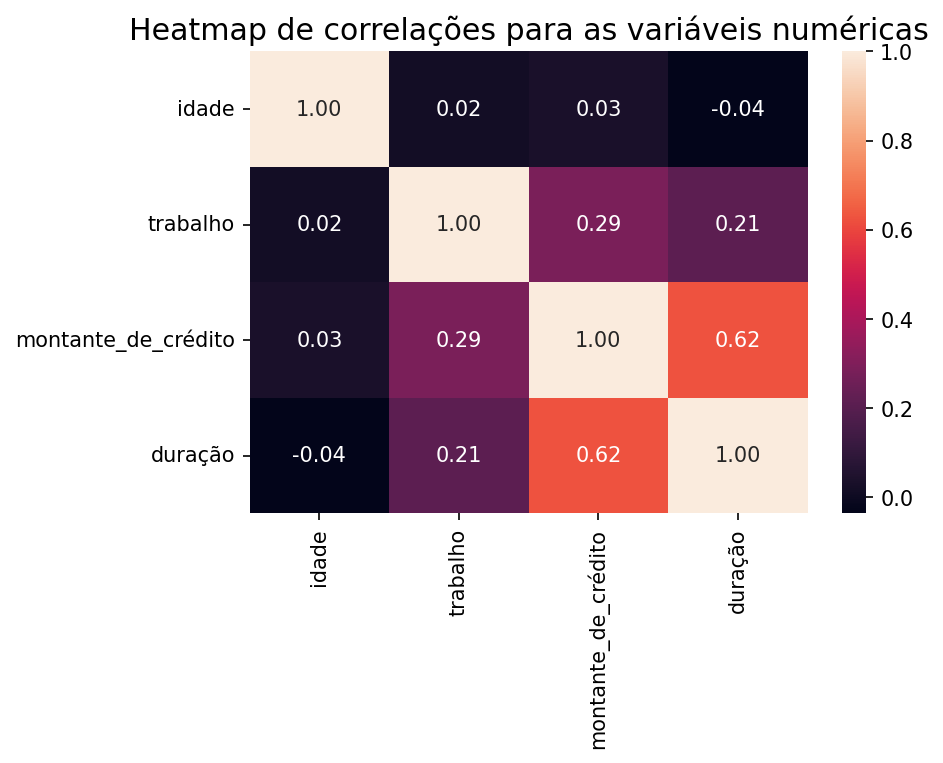

In [13]:
#heatmap de correlação para variáveis numéricas

# Selecionar apenas as variáveis do tipo int64
df_num = df.select_dtypes(include=['int64'])

# Calcular a matriz de correlação
corr = df_num.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap de correlações para as variáveis numéricas')
plt.show()


**Heatmap de Correlações para variáveis numéricas**
- Há uma correlação moderada entre as variáveis "montante de crédito" e "duração"
- Isso sugere , indicando que conforme a duração aumenta, o montante de crédito tende a aumentar de maneira significativa.

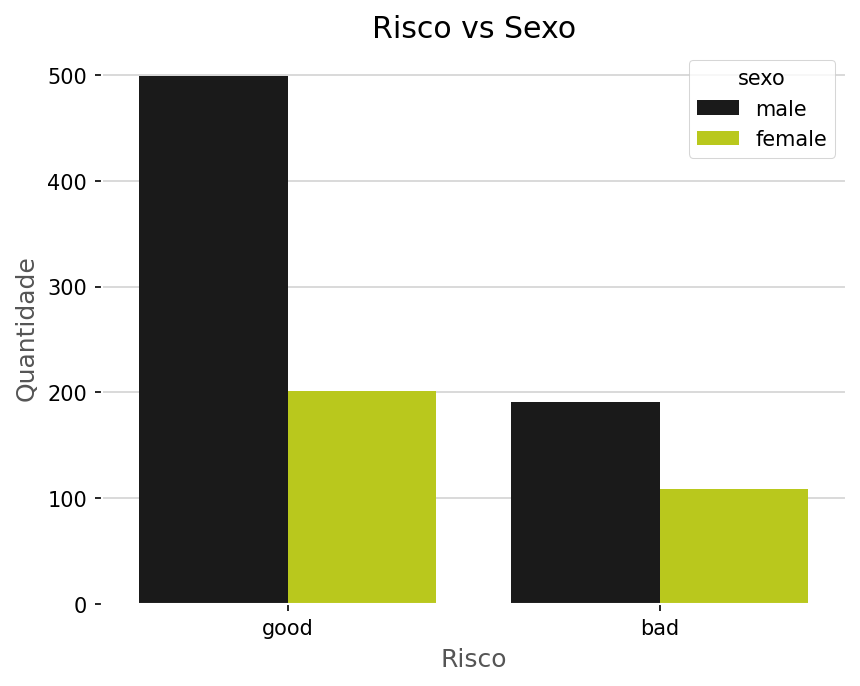

In [14]:
# Gráfico de Barras Agrupadas para "risco" em relação a "sexo"
sns.countplot(x='risco', hue='sexo', data=df)
plt.title('Risco vs Sexo')
plt.xlabel('Risco')
plt.ylabel('Quantidade')
plt.show()

**Risco vs Sexo:**

- A maior parte dos homens são classificados como risco "bom".
- No entanto para a categoria "ruim" a proporção de indivíduos do sexo "masculino" também é maior em relação ao sexo "feminino", porém, um pouco mais equilibrada.
- Isso pode indicar que, entre os homens, há uma maior proporção de casos de baixo risco em comparação às mulheres. No entanto, vale ressaltar que há uma predominância de indivíduos do sexo masculino na amostra analisada.

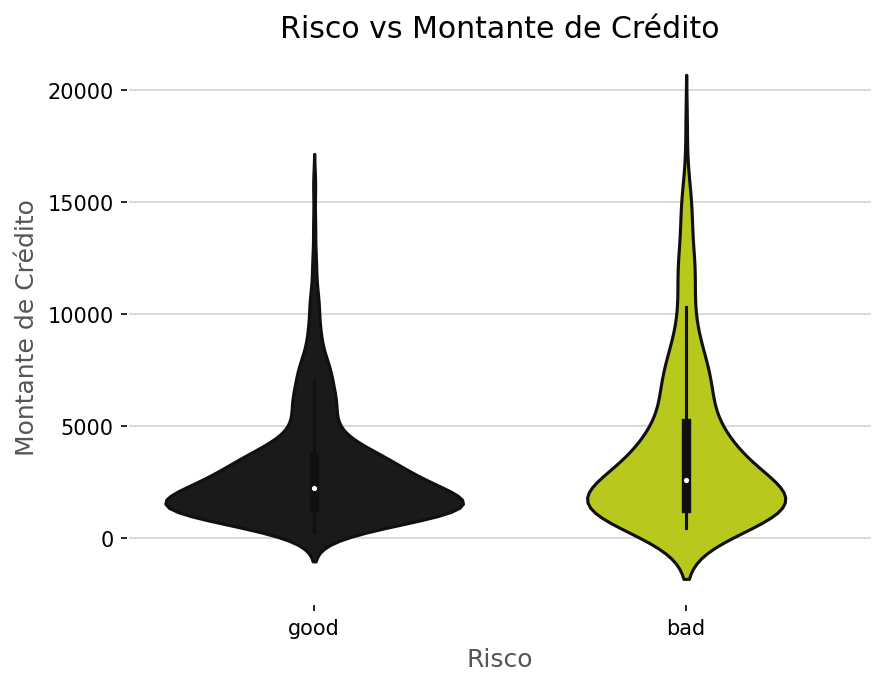

In [15]:
# Violin Plot para "risco" em relação a "montante_de_crédito"
sns.violinplot(x='risco', y='montante_de_crédito', data=df)
plt.title('Risco vs Montante de Crédito')
plt.xlabel('Risco')
plt.ylabel('Montante de Crédito')
plt.show()

**Risco vs Montante de Crédito:**

- Pessoas na categoria de risco "ruim" tendem a ter montantes de crédito mais altos.
- A maior variabilidade na categoria "ruim" pode indicar uma maior incerteza ou risco associado a créditos mais altos.
- A distribuição mais concentrada na categoria "bom" sugere que créditos menores estão mais associados a perfis de baixo risco.

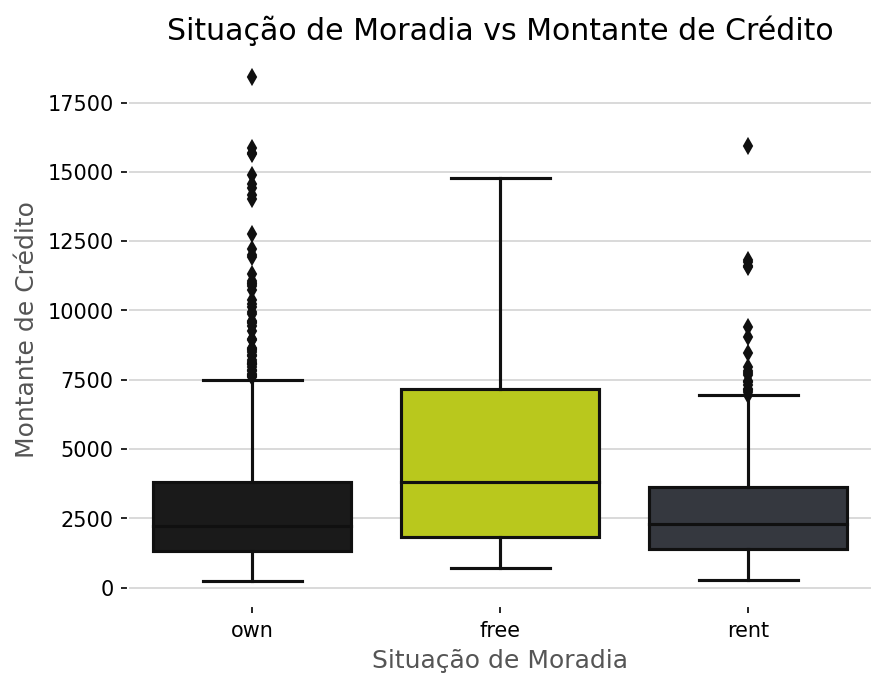

In [16]:
# Boxplot entre situação_de_moradia e montante_de_crédito
sns.boxplot(x='situação_de_moradia', y='montante_de_crédito', data=df)
plt.title('Situação de Moradia vs Montante de Crédito')
plt.xlabel('Situação de Moradia')
plt.ylabel('Montante de Crédito')
plt.show()

**Situação de Moradia vs Montante de Crédito:**

- Situação de moradia (própria): A mediana do montante de crédito para quem possui a própria casa é mais baixa (cerca de 2500), com menos variabilidade e alguns outliers acima de 12500.
- Situação de moradia (grátis): A mediana é significativamente maior (cerca de 5000), indicando que pessoas sem custo de moradia tendem a solicitar montantes de crédito mais altos. A variabilidade é também maior, com outliers que chegam a 15000 e além.
- Situação de moradia (alugada): Similar a "própria" em termos de mediana (cerca de 2500), mas com menos outliers extremos.
- **Conclusão**: A situação de moradia influencia no montante de crédito solicitado, com quem não tem custo de moradia solicitando, em média, montantes mais altos.

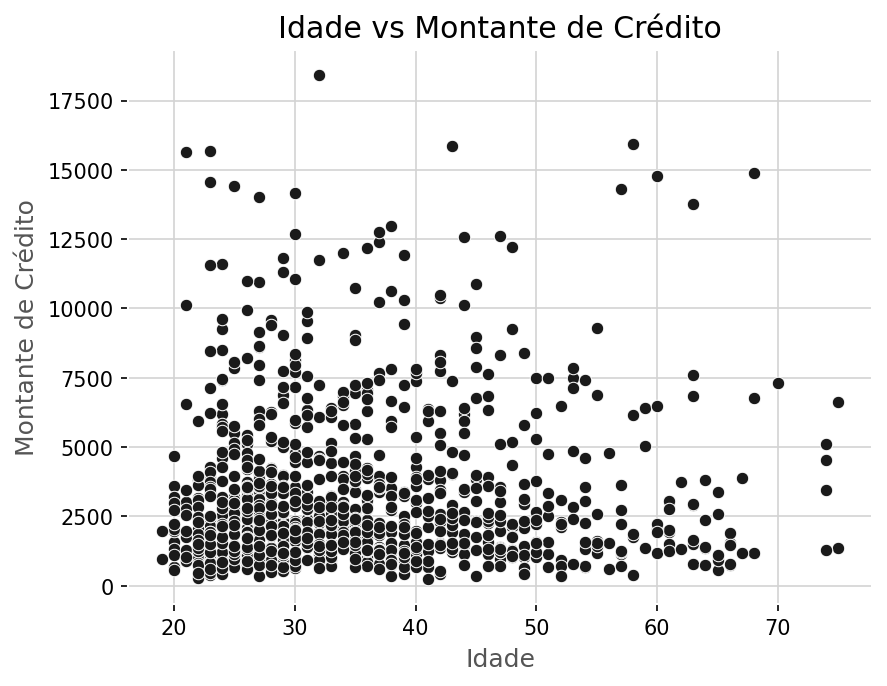

In [17]:
# Gráfico de Dispersão (Scatter Plot) entre Idade e Valor do Crédito
sns.scatterplot(x='idade', y='montante_de_crédito', data=df)
plt.title('Idade vs Montante de Crédito')
plt.xlabel('Idade')
plt.ylabel('Montante de Crédito')
plt.show()

**Idade vs Montante de Crédito:**

- Distribuição Geral: Há uma concentração de dados em faixas etárias mais jovens (20-40 anos) e em montantes menores (0-5000).
- Tendência: Observa-se uma dispersão significativa, mas não uma clara correlação entre idade e montante de crédito. Há uma concentração maior em montantes baixos e faixas etárias mais jovens

## Análise Multivariada

- A análise multivariada é crucial na análise de risco de crédito pois permite a avaliação simultânea de múltiplas variáveis, revelando como elas interagem e afetam conjuntamente o comportamento de crédito dos clientes. Ela permite captar interações complexas entre diversas variáveis, possibilitando a identificação de padrões de risco que não são evidentes ao analisar variáveis de forma isolada. 

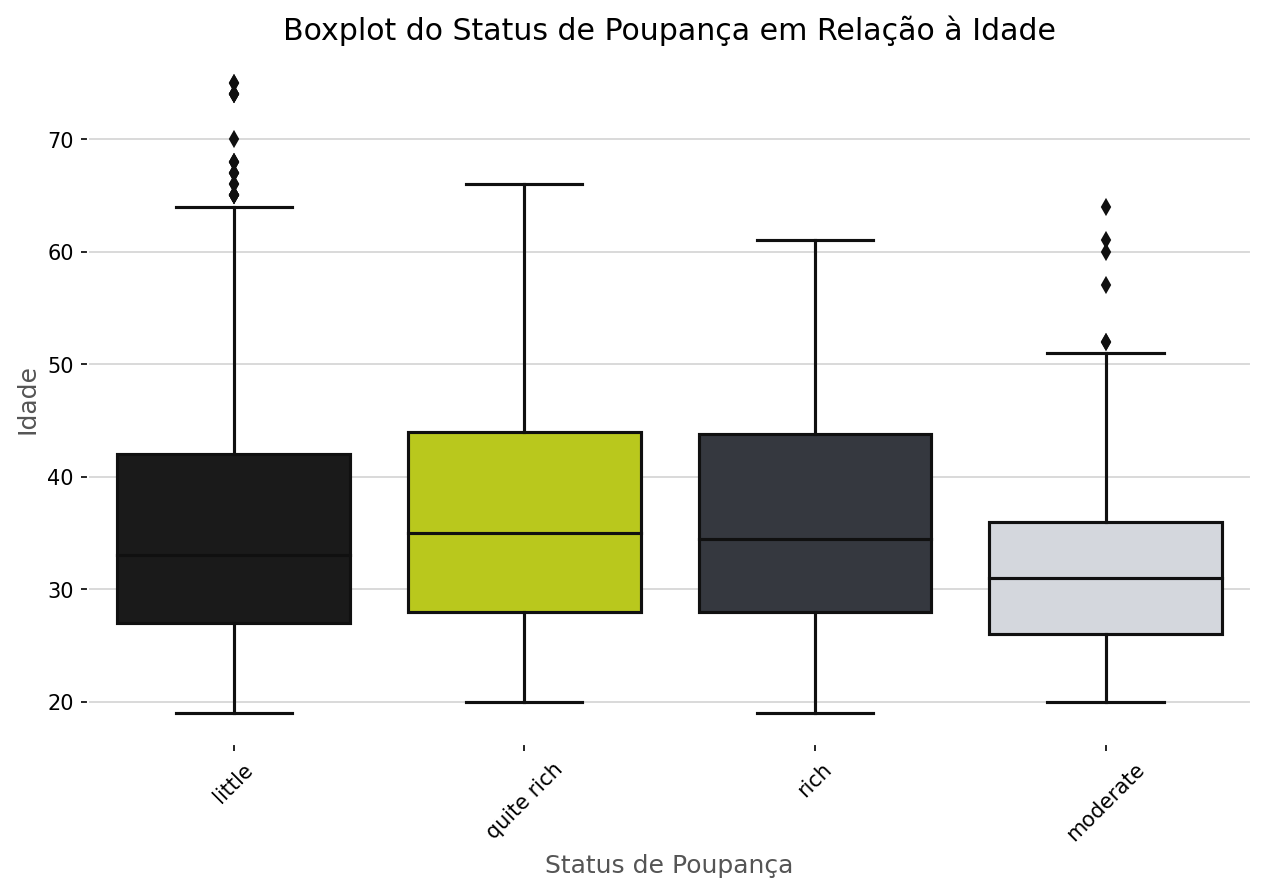

In [18]:
# Boxplot do status de poupança em relação à idade
plt.figure(figsize=(10, 6))
sns.boxplot(x='poupança', y='idade', data=df)
plt.title('Boxplot do Status de Poupança em Relação à Idade')
plt.xlabel('Status de Poupança')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.show()

**Boxplot do Status de Poupança em Relação à Idade:**

- A análise sugere que pessoas com status de poupança "baixa" possuem uma maior variabilidade de idades, com muitos indivíduos mais velhos possivelmente com menos poupança.
- Indivíduos classificados como "muito rico" e "rico" tendem a estar na faixa dos 30-50 anos.
- O status de poupança "moderada" apresenta uma distribuição de idade mais jovem comparativamente a "muito rico" e "rico".

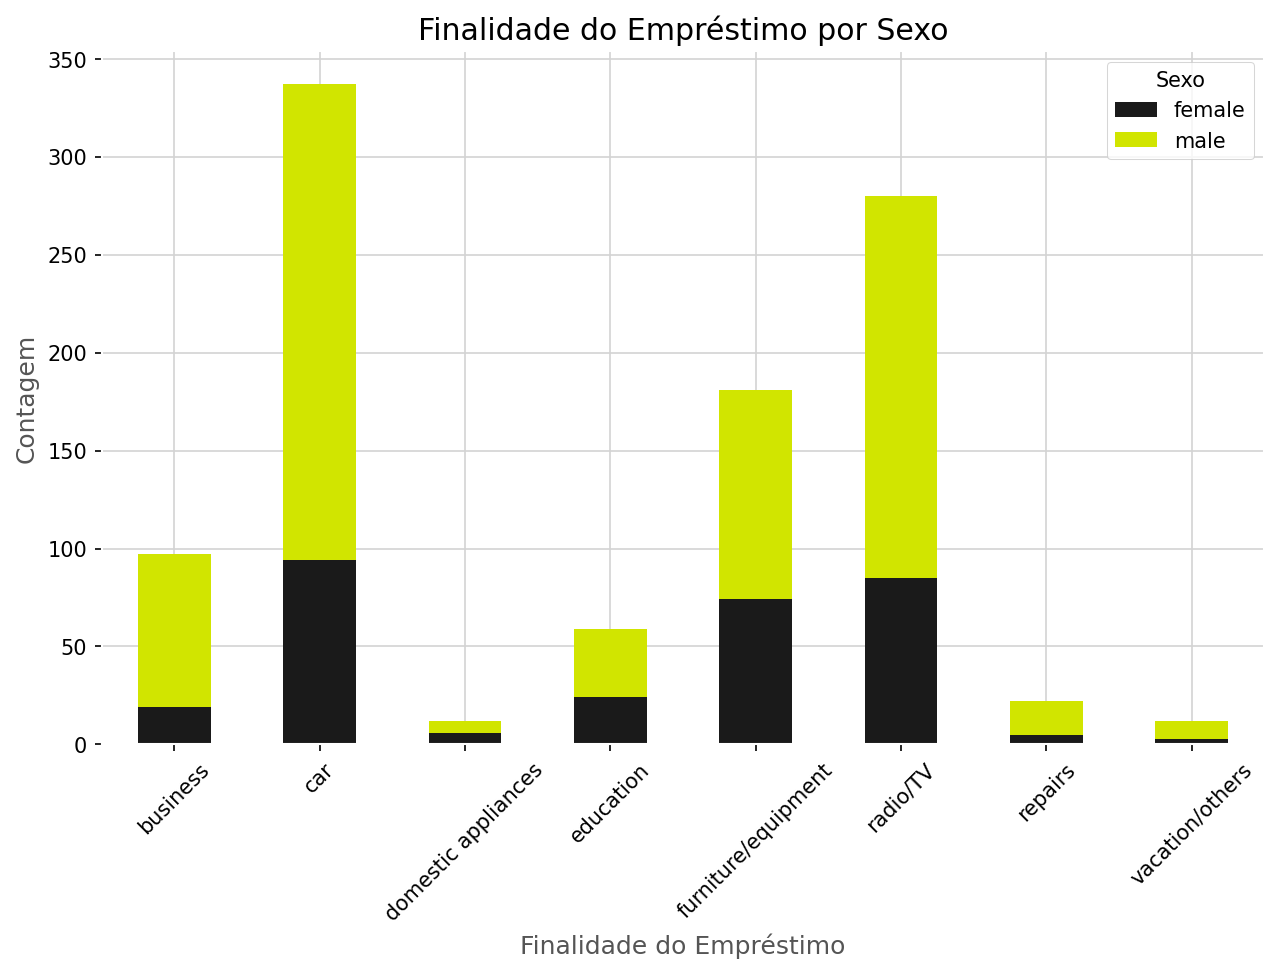

In [19]:
# Gráfico de barras empilhadas para finalidade do crédito em relação ao sexo
purpose_sex = df.groupby(['finalidade', 'sexo']).size().unstack()
purpose_sex.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Finalidade do Empréstimo por Sexo')
plt.xlabel('Finalidade do Empréstimo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

**Propóstio do empréstimo por sexo**

- Homens tomam mais empréstimos em quase todas as categorias. (muito provavelmente isso está realacionado com a predominância de indivíduos do sexo masculino em realção ao sexo feminino na amostra analisada).
- "Carros" e itens de "rádio/TV" são os propósitos mais comuns para ambos os sexos.
- As categorias "Educação" e "consertos" como finalidade do crédito têm uma distribuição relativamente mais equilibrada entre homens e mulheres.

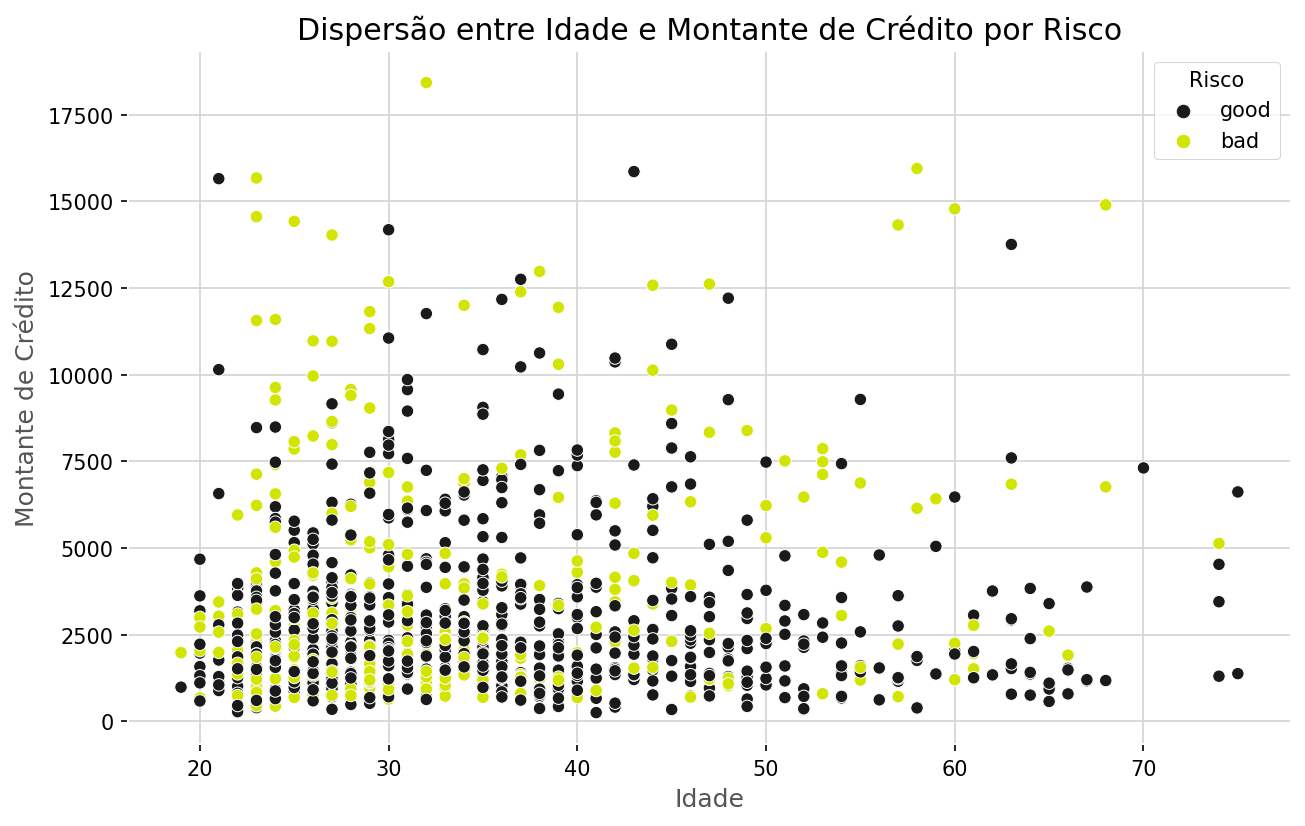

In [20]:
# Gráfico de dispersão entre idade e montante de crédito em relação ao risco
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='montante_de_crédito', data=df, hue='risco')
plt.title('Dispersão entre Idade e Montante de Crédito por Risco')
plt.xlabel('Idade')
plt.ylabel('Montante de Crédito')
plt.legend(title='Risco')
plt.show()

**Dispersão entre Idade e Montante de Crédito por Risco**:

- Distribuição Geral: A maioria dos pontos se concentra na faixa de idade de 20 a 60 anos e no montante de crédito de 0 a 5000.
- Créditos Bons (pontos pretos): Estão distribuídos ao longo de todas as idades e montantes, mas tendem a se concentrar em montantes menores.
- Créditos Ruins (pontos amarelos): Também estão espalhados, mas parecem mais presentes em faixas de crédito mais altas e em idades variáveis.
- Tendência: Não há uma tendência clara e forte que relacione idade com montante de crédito especificamente associada ao risco. No entanto, observa-se uma maior variabilidade de montante de crédito em faixas etárias mais jovens.

## Pré processamento dos dados para a modelagem

A etapa de pré-processamento dos dados é essencial para garantir que o modelo de análise de risco de crédito funcione de forma eficiente, precisa e robusta. Ele melhora a qualidade dos dados, reduz a complexidade e o ruído, e prepara o terreno para a construção de modelos mais precisos e generalizáveis, aumentando a eficácia das previsões e a confiança nas decisões baseadas nesses modelos.

In [21]:
# Codificar as variáveis (com ordem de grandeza) utilizando Ordinal Encoder.

from sklearn.preprocessing import OrdinalEncoder

# Definir a ordem das categorias
poupanca_order = ['little', 'moderate', 'quite rich', 'rich']
conta_corrente_order = ['little', 'moderate', 'rich']

# Inicializar o OrdinalEncoder com as categorias ordenadas
ordinal_encoder = OrdinalEncoder(categories=[poupanca_order, conta_corrente_order])

# Aplicar o OrdinalEncoder para as colunas 'Poupança', 'Conta corrente' e "situação_de_moradia"
encoded_columns = ordinal_encoder.fit_transform(df[['poupança', 'conta_corrente']])

# Convertendo os valores codificados para inteiros
df[['poupança_encoded', 'conta_corrente_encoded']] = encoded_columns.astype(int)

# Remover as colunas originais
df.drop(['poupança', 'conta_corrente'], axis=1, inplace=True)

# Verificar o resultado
df.head()

,idade,sexo,trabalho,situação_de_moradia,montante_de_crédito,duração,finalidade,risco,poupança_encoded,conta_corrente_encoded
0,67,male,2,own,1169,6,radio/TV,good,0,0
1,22,female,2,own,5951,48,radio/TV,bad,0,1
2,49,male,1,own,2096,12,education,good,0,0
3,45,male,2,free,7882,42,furniture/equipment,good,0,0
4,53,male,2,free,4870,24,car,bad,0,0


In [22]:
# transformar as variáveis categóricas (sem ordem de grandeza) em variáveis dummy
df = pd.get_dummies(df, columns=['risco','sexo', 'situação_de_moradia', 'finalidade'])
df

,idade,trabalho,montante_de_crédito,duração,poupança_encoded,conta_corrente_encoded,risco_bad,risco_good,sexo_female,sexo_male,...,situação_de_moradia_own,situação_de_moradia_rent,finalidade_business,finalidade_car,finalidade_domestic appliances,finalidade_education,finalidade_furniture/equipment,finalidade_radio/TV,finalidade_repairs,finalidade_vacation/others
0,67,2,1169,6,0,0,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
1,22,2,5951,48,0,1,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2,49,1,2096,12,0,0,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
3,45,2,7882,42,0,0,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
4,53,2,4870,24,0,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
996,40,3,3857,30,0,0,False,True,False,True,...,True,False,False,True,False,False,False,False,False,False
997,38,2,804,12,0,0,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
998,23,2,1845,45,0,0,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [23]:
# excluir um dos atributos para cada categoria (binária) a fim de reduzir multicolinearidade

columns_to_drop = ['risco_bad', 'sexo_male', 'situação_de_moradia_free', 'finalidade_vacation/others']
df = df.drop(columns=columns_to_drop)
df

,idade,trabalho,montante_de_crédito,duração,poupança_encoded,conta_corrente_encoded,risco_good,sexo_female,situação_de_moradia_own,situação_de_moradia_rent,finalidade_business,finalidade_car,finalidade_domestic appliances,finalidade_education,finalidade_furniture/equipment,finalidade_radio/TV,finalidade_repairs
0,67,2,1169,6,0,0,True,False,True,False,False,False,False,False,False,True,False
1,22,2,5951,48,0,1,False,True,True,False,False,False,False,False,False,True,False
2,49,1,2096,12,0,0,True,False,True,False,False,False,False,True,False,False,False
3,45,2,7882,42,0,0,True,False,False,False,False,False,False,False,True,False,False
4,53,2,4870,24,0,0,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,True,True,True,False,False,False,False,False,True,False,False
996,40,3,3857,30,0,0,True,False,True,False,False,True,False,False,False,False,False
997,38,2,804,12,0,0,True,False,True,False,False,False,False,False,False,True,False
998,23,2,1845,45,0,0,False,False,False,False,False,False,False,False,False,True,False


In [24]:
#codificar as colunas com variáveis dummy

columns_to_encode = ['risco_good', 'sexo_female', 'situação_de_moradia_own', 'situação_de_moradia_rent', 'finalidade_business', 
                     'finalidade_car', 'finalidade_domestic appliances', 'finalidade_education', 'finalidade_furniture/equipment',
                     'finalidade_radio/TV', 'finalidade_repairs']

# Aplicar one-hot encoding para as colunas especificadas
for col in columns_to_encode:
    df[col + '_encoded'] = df[col].astype(int)
    df.drop(col, axis=1, inplace=True)
df

,idade,trabalho,montante_de_crédito,duração,poupança_encoded,conta_corrente_encoded,risco_good_encoded,sexo_female_encoded,situação_de_moradia_own_encoded,situação_de_moradia_rent_encoded,finalidade_business_encoded,finalidade_car_encoded,finalidade_domestic appliances_encoded,finalidade_education_encoded,finalidade_furniture/equipment_encoded,finalidade_radio/TV_encoded,finalidade_repairs_encoded
0,67,2,1169,6,0,0,1,0,1,0,0,0,0,0,0,1,0
1,22,2,5951,48,0,1,0,1,1,0,0,0,0,0,0,1,0
2,49,1,2096,12,0,0,1,0,1,0,0,0,0,1,0,0,0
3,45,2,7882,42,0,0,1,0,0,0,0,0,0,0,1,0,0
4,53,2,4870,24,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,1,1,1,0,0,0,0,0,1,0,0
996,40,3,3857,30,0,0,1,0,1,0,0,1,0,0,0,0,0
997,38,2,804,12,0,0,1,0,1,0,0,0,0,0,0,1,0
998,23,2,1845,45,0,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
#Traduzir colunas para o português

traducao_colunas = {
    'poupança_encoded': 'poupança',
    'conta_corrente_encoded': 'conta_corrente',
    'risco_good_encoded': 'risco',
    'sexo_female_encoded': 'sexo',
    'situação_de_moradia_own_encoded': 'moradia_própria',
    'situação_de_moradia_rent_encoded': 'moradia_alugada',
    'finalidade_business_encoded': 'finalidade_negócio',
    'finalidade_car_encoded': 'finalidade_carro',
    'finalidade_domestic appliances_encoded': 'finalidade_eletrodomésticos',
    'finalidade_education_encoded': 'finalidade_educação',
    'finalidade_furniture/equipment_encoded': 'finalidade_móveis/equipamentos',
    'finalidade_radio/TV_encoded': 'finalidade_rádio/TV',
    'finalidade_repairs_encoded': 'finalidade_reparos',
}

df.rename(columns=traducao_colunas, inplace=True)
df

,idade,trabalho,montante_de_crédito,duração,poupança,conta_corrente,risco,sexo,moradia_própria,moradia_alugada,finalidade_negócio,finalidade_carro,finalidade_eletrodomésticos,finalidade_educação,finalidade_móveis/equipamentos,finalidade_rádio/TV,finalidade_reparos
0,67,2,1169,6,0,0,1,0,1,0,0,0,0,0,0,1,0
1,22,2,5951,48,0,1,0,1,1,0,0,0,0,0,0,1,0
2,49,1,2096,12,0,0,1,0,1,0,0,0,0,1,0,0,0
3,45,2,7882,42,0,0,1,0,0,0,0,0,0,0,1,0,0
4,53,2,4870,24,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,1,1,1,0,0,0,0,0,1,0,0
996,40,3,3857,30,0,0,1,0,1,0,0,1,0,0,0,0,0
997,38,2,804,12,0,0,1,0,1,0,0,0,0,0,0,1,0
998,23,2,1845,45,0,0,0,0,0,0,0,0,0,0,0,1,0


- Aplicar o balanceamento de classes da variável "risco" utilizando a técnica over-sampling SMOTE que consiste em gerar novos exemplos sintéticos da classe minoritária, para evitar que o modelo seja tendencioso para a classe majoritária.
- Métodos simples de over-sampling, como replicar aleatoriamente exemplos da classe minoritária, podem levar a overfitting.
- O SMOTE cria novos exemplos sintéticos da classe minoritária ao invés de simplesmente replicar exemplos existentes. Isso é feito gerando novas instâncias que são combinações lineares de pares de exemplos existentes na classe minoritária.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

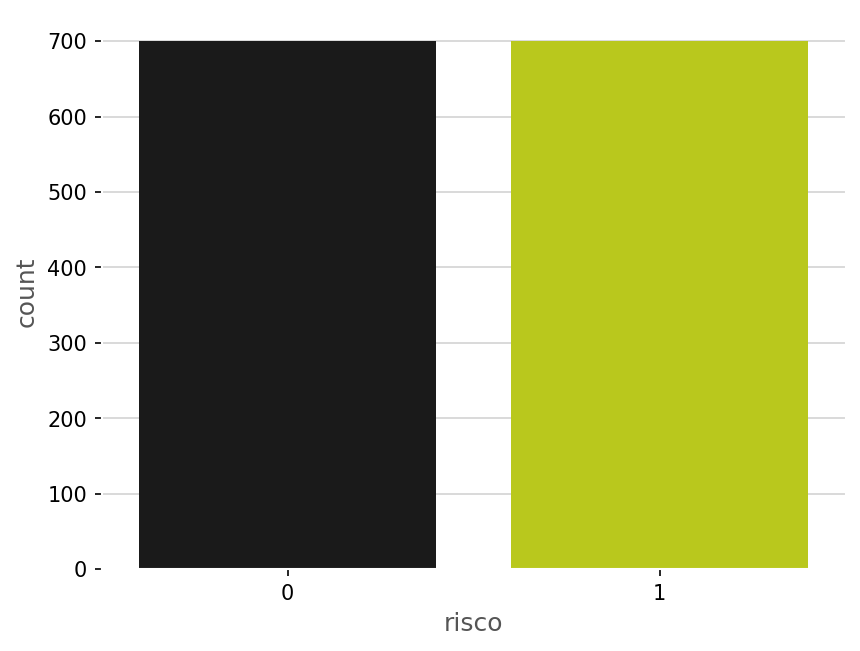

In [26]:
from imblearn.over_sampling import SMOTE

#Separar os dados em veriável target ('risco') e variáveis explicativas (features)
X = df.drop('risco', axis = 1)
y = df['risco']

smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

#junção dos dados balanceados
df = pd.concat([X, y], axis=1)

#verificação após o balanceamento
ax = sns.countplot(x='risco', data=df)

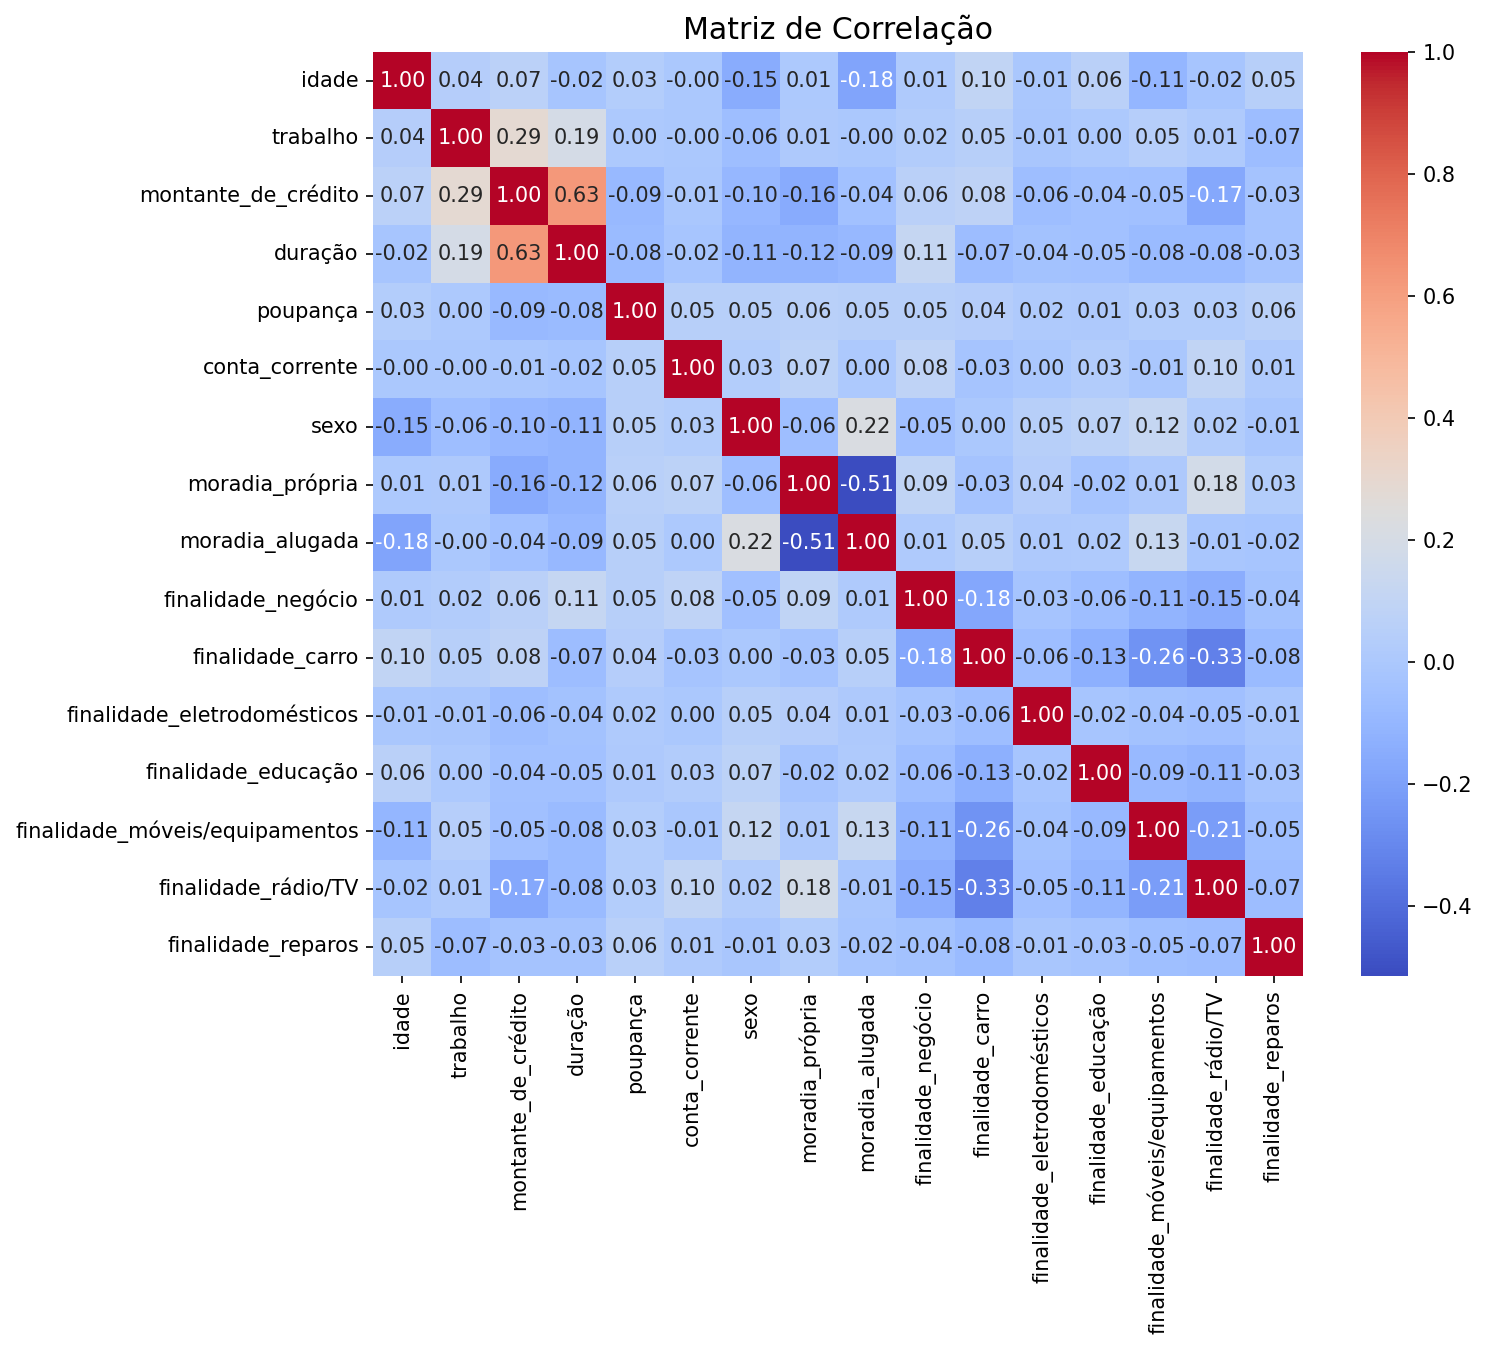

In [27]:
#analisando multicolinearidade das features

correlation_matrix = X.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [28]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

df['faixa_idade'] = pd.cut(x = df['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])

In [29]:
#criando 'faixa_duração' para variavel 'duração'

## 01 - 12 = 1
## 13 - 24 = 2
## 25 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6

df['faixa_duração'] = pd.cut(x = df['duração'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])

In [30]:
#criando 'faixa_montante_de_crédito' para variavel 'montante_de_crédito'

## 1 - 1000 = 1
## 1001 - 2000 = 2
## 2001 - 3000 = 3
## 3001 - 4000 = 4
## 4001 - 5000 = 5
## 5001 - 6000 = 6
## 6001 - 7000 = 7
## 7001 - 8000 = 8
## 8001 - 9000 = 9
## 9001 - 10000 = 10
## 10001 - 11000 = 11
## 11001 - 12000 = 12
## 12001 - 13000 = 13
## 13001 - 14000 = 14
## 14001 - 15000 = 15
## 15001 - 16000 = 16
## 16001 - 17000 = 17
## 17001 - 18000 = 18
## 18001 - 19000 = 19

df['faixa_montante_de_crédito'] = pd.cut(x = df['montante_de_crédito'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000], 
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [31]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['idade', 'duração', 'montante_de_crédito']
df = df.drop(columns=colunas_retiradas)
df

,trabalho,poupança,conta_corrente,sexo,moradia_própria,moradia_alugada,finalidade_negócio,finalidade_carro,finalidade_eletrodomésticos,finalidade_educação,finalidade_móveis/equipamentos,finalidade_rádio/TV,finalidade_reparos,risco,faixa_idade,faixa_duração,faixa_montante_de_crédito
0,2,0,0,0,1,0,0,0,0,0,0,1,0,1,5,1,2
1,2,0,1,1,1,0,0,0,0,0,0,1,0,0,1,4,6
2,1,0,0,0,1,0,0,0,0,1,0,0,0,1,3,1,3
3,2,0,0,0,0,0,0,0,0,0,1,0,0,1,3,4,8
4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,9
1396,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
1397,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,3
1398,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,3,5


In [32]:
#dividir os dados em variável target (y) e características (x) após criar as faixas 

X = df.drop('risco', axis = 1)
y = df['risco']

In [33]:
# divisão dos dados em teino e teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelo Regressão Logística

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

- O modelo de regressão logística caracteriza-se por descrever a relação entre várias variáveis independentes (X) e uma variável dependente (Y), representando a presença (1) ou ausência (0) de uma característica.

- O risco de crédito é geralmente um problema de classificação binária, onde o objetivo é prever se um cliente será um "bom" ou "mau" pagador. A regressão logística é especificamente projetada para lidar com tais problemas de classificação binária.

- Os coeficientes da regressão logística podem ser interpretados como a mudança logarítmica na probabilidade de inadimplência associada a uma unidade de aumento em uma variável preditora.

- A Regressão Logística é baseada em uma base estatística sólida, sendo uma escolha tradicional para problemas de classificação binária, como a decisão entre conceder ou não crédito. Sua eficácia é amplamente comprovada em diversas aplicações de risco de crédito.

- A simplicidade e a interpretabilidade da regressão logística a tornam mais compatível com regulamentos que exigem explicações claras sobre a decisão de crédito.
-----

Função Sigmóide (Logística):
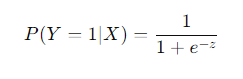
Em que:

- P(Y=1|X) é a probabilidade condicional de Y ser 1, dado o conjunto de variáveis independentes X.
- e é a base do logaritmo natural (aproximadamente 2,71828).

Equação Linear de Entrada:
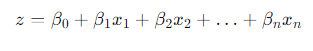

Probabilidade da Classe Alternativa:
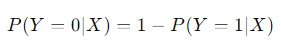

In [34]:
#importar as bibliotecas para a modelagem, otimização de parâmetros e avaliação de desempenho dos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

Melhor valor para max_iter: 100
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       206
           1       0.73      0.81      0.77       214

    accuracy                           0.75       420
   macro avg       0.75      0.75      0.75       420
weighted avg       0.75      0.75      0.75       420

roc_auc 0.8213977860448236


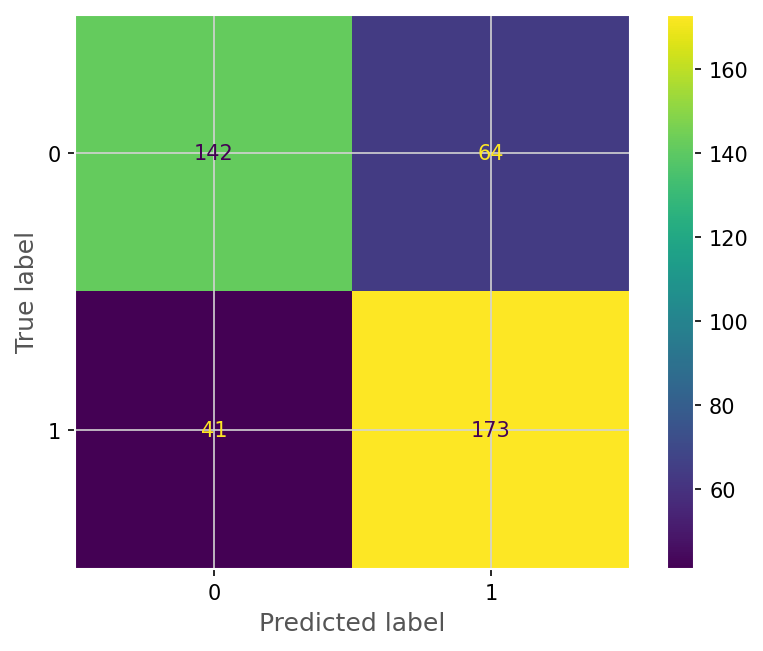

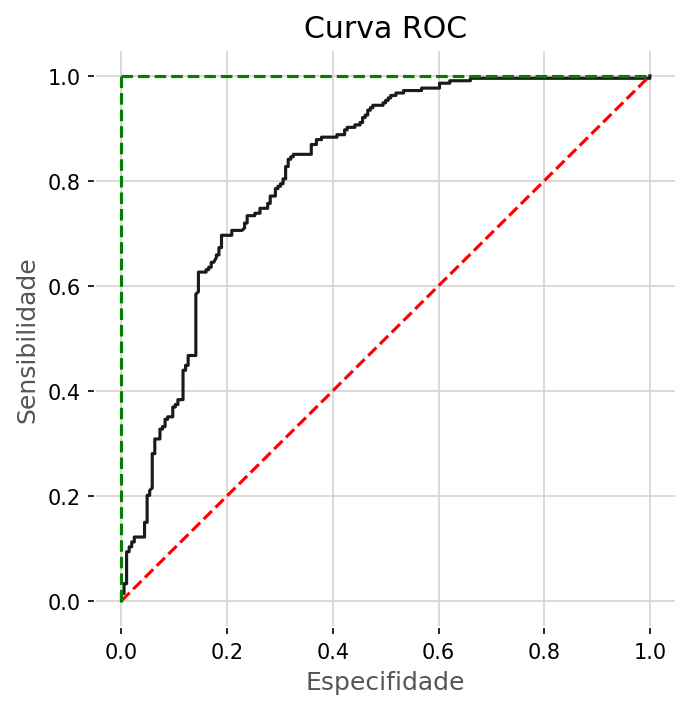

In [35]:
# Definir o modelo
lr = LogisticRegression(random_state=123)

# Definir a grade de parâmetros para max_iter
param_grid = {'max_iter': [100, 200, 500, 1000]}

# Realizar a busca em grade para encontrar o melhor parâmetro max_iter
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_treino, y_treino)

# Obter o melhor valor para max_iter
best_max_iter = grid_search.best_params_['max_iter']
print(f"Melhor valor para max_iter: {best_max_iter}")

# Avaliar o modelo com o melhor parâmetro max_iter
best_model_lr = grid_search.best_estimator_
predito_lr = best_model_lr.predict(X_teste)

#curva roc
prob_previsao = best_model_lr.predict_proba(X_teste)[:,1]
tfp, tvp, limite = roc_curve(y_teste, prob_previsao)

# Avaliando o desempenho do modelo
print(classification_report(y_teste, predito_lr))
print('roc_auc', roc_auc_score(y_teste, prob_previsao))

#matriz de confusão
cm = confusion_matrix(y_teste, predito_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#plotando a curva roc
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

In [36]:
# entender o impacto de cada característica na probabilidade de classificação de risco 1 (bom pagador)

# Extrair os coeficientes
coefficients = best_model_lr.coef_[0]

# Calcular as razões de chances
odds_ratios = np.exp(coefficients)

# Organizar os resultados em um DataFrame para visualização
feature_names = X_treino.columns
odds_ratios_df = pd.DataFrame({'Feature': feature_names, 'Odds Ratio': odds_ratios})
odds_ratios_df.sort_values(by='Odds Ratio', ascending=False, inplace=True)

# Exibir os resultados
print(odds_ratios_df)

                           Feature  Odds Ratio
11             finalidade_rádio/TV   13.023169
10  finalidade_móveis/equipamentos    8.853396
7                 finalidade_carro    8.496025
6               finalidade_negócio    8.424910
9              finalidade_educação    6.164634
8      finalidade_eletrodomésticos    4.173156
12              finalidade_reparos    4.079416
4                  moradia_própria    3.742124
5                  moradia_alugada    2.522518
1                         poupança    1.775492
0                         trabalho    1.345367
13                     faixa_idade    1.344642
2                   conta_corrente    1.094912
15       faixa_montante_de_crédito    1.033673
3                             sexo    1.030320
14                   faixa_duração    0.602976


- A finalidade do crédito é um fator determinante para prever o comportamento de pagamento. Clientes que pedem crédito para fins como rádio/TV, móveis/equipamentos e negócios têm maior probabilidade de pagar pontualmente.
- Com relação à situação de moradia, proprietários de imóveis têm uma maior probabilidade de serem bons pagadores comparados a inquilinos, indicando que a estabilidade residencial é um fator positivo para o pagamento pontual.
- Características como ter uma poupança, estar empregado e possuir uma conta corrente estão associadas a uma maior probabilidade de ser um bom pagador, embora o impacto seja menor comparado às finalidades do empréstimo.
- Créditos com maior duração estão associados a um maior risco de não pagamento, sugerindo que empréstimos de curto prazo podem ser mais seguros.

## Modelo Árvores de Decisão

- Árvore de Decisão é uma técnica de machine learning usada para classificação e regressão, que divide os dados em subconjuntos baseados nos valores de suas variáveis preditoras, criando uma estrutura em forma de árvore onde cada nó representa uma decisão baseada em uma característica dos dados. Cada ramo representa o resultado de uma decisão, levando a nós folha que indicam as classes ou valores finais de predição.

- As Árvores de Decisão são capazes de capturar interações complexas entre variáveis preditoras sem a necessidade de especificá-las explicitamente. Isso é particularmente útil em cenários de risco de crédito, onde a interação entre várias características pode ser crucial para determinar o risco de inadimplência.

- Assim como a Regressão Logística, as Árvores de Decisão são fáceis de interpretar e visualizar, o que facilita a comunicação dos resultados para stakeholders e permite uma auditoria clara das decisões

- Árvores de Decisão são robustas a outliers e não pressupõem linearidade nas relações entre as variáveis, sendo adequadas para captar padrões complexos nos dados.
----------

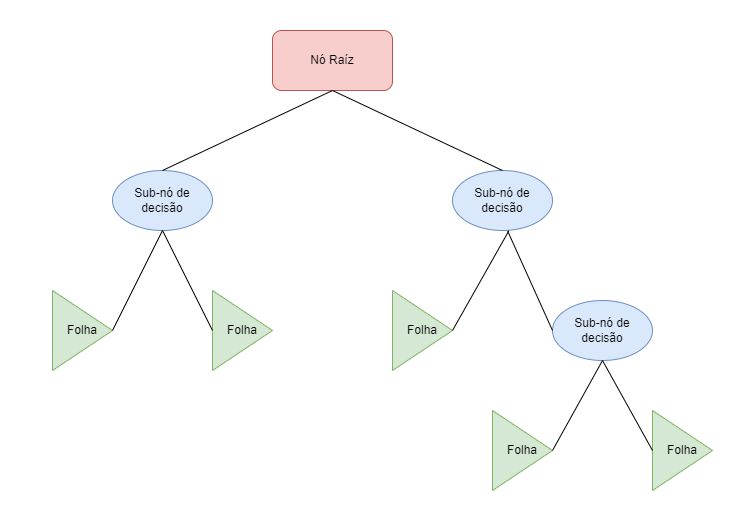

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       206
           1       0.73      0.66      0.69       214

    accuracy                           0.70       420
   macro avg       0.70      0.70      0.70       420
weighted avg       0.70      0.70      0.70       420

roc_auc 0.7575537610017241


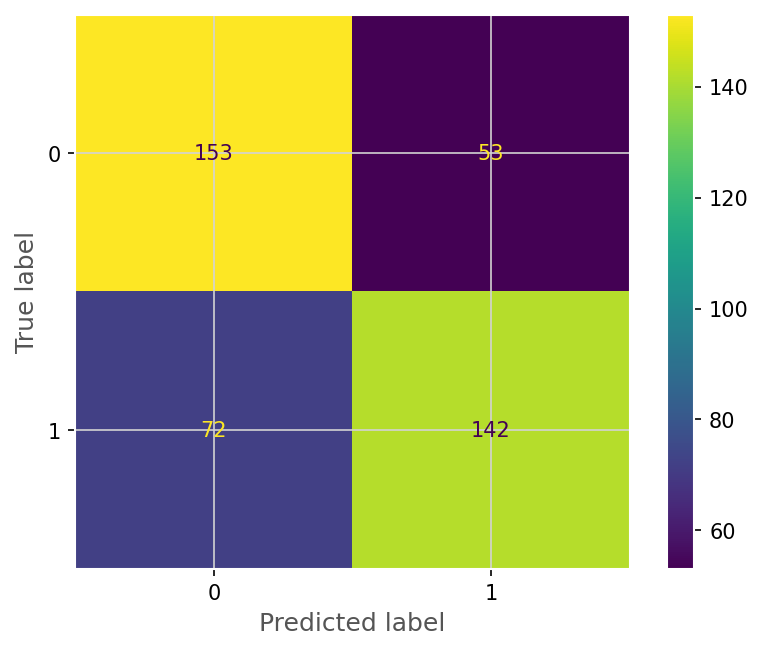

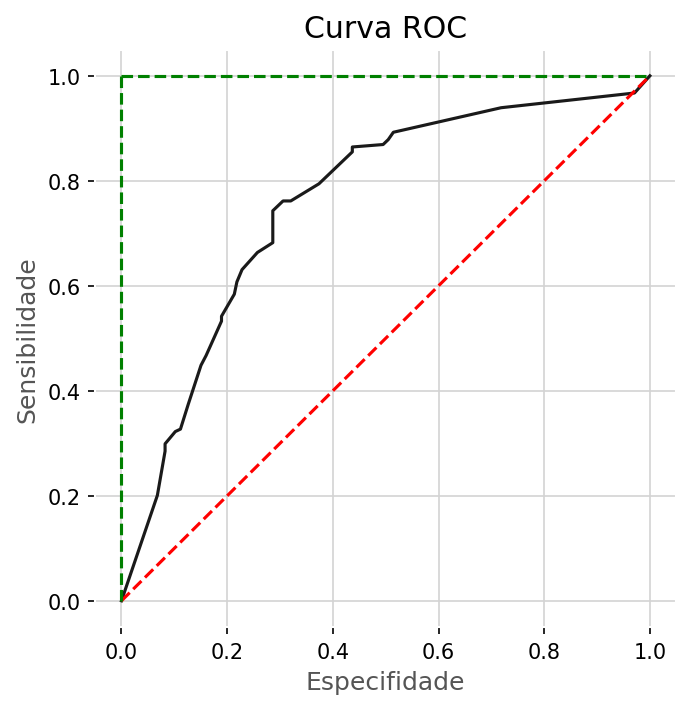

In [37]:
# Definir o modelo
dt = DecisionTreeClassifier(random_state=42)

# Definir a grade de parâmetros corrigida
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

# Definir o grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

# Ajustar o modelo
grid_search.fit(X_treino, y_treino)

# Obter os melhores parâmetros
best_params = grid_search.best_params_

# Exibir os melhores parâmetros
print(f"Melhores parâmetros: {best_params}")

# Avaliar o modelo com os melhores parâmetros
best_model_dt = grid_search.best_estimator_
predito_dt = best_model_dt.predict(X_teste)

#matriz de confusão
cm = confusion_matrix(y_teste, predito_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#curva roc
prob_previsao = best_model_dt.predict_proba(X_teste)[:,1]
tfp, tvp, limite = roc_curve(y_teste, prob_previsao)

# Avaliando o desempenho do modelo
print(classification_report(y_teste, predito_dt))
print('roc_auc', roc_auc_score(y_teste, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

## Modelo Random Forest

- As Florestas Aleatórias combinam múltiplas Árvores de Decisão, cada uma construída a partir de diferentes subconjuntos do conjunto de dados, o que reduz significativamente o risco de overfitting em comparação com uma única árvore. Isso resulta em um modelo mais robusto e generalizável.

- Florestas Aleatórias são eficazes em lidar com conjuntos de dados grandes e complexos, com muitas variáveis preditoras e interações. Isso é ideal para cenários de crédito, onde a quantidade de dados pode ser volumosa e as interações entre as variáveis são complexas.

- Esse modelo oferece uma medida de importância das variáveis, que ajuda a identificar quais atributos são mais relevantes para a predição do risco de crédito, fornecendo insights valiosos para o negócio.

- Como as decisões são tomadas por consenso de várias árvores, o modelo é menos sensível a outliers e variações nos dados, tornando-o mais estável.
----------------------

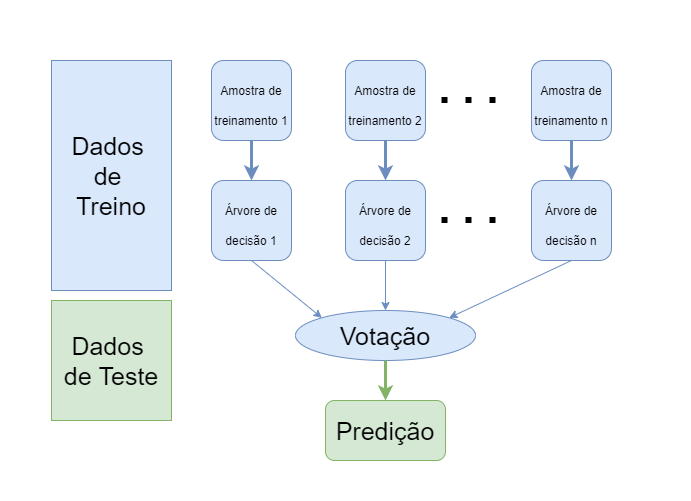

Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       206
           1       0.74      0.77      0.75       214

    accuracy                           0.74       420
   macro avg       0.74      0.74      0.74       420
weighted avg       0.74      0.74      0.74       420

roc_auc 0.8146606478540966


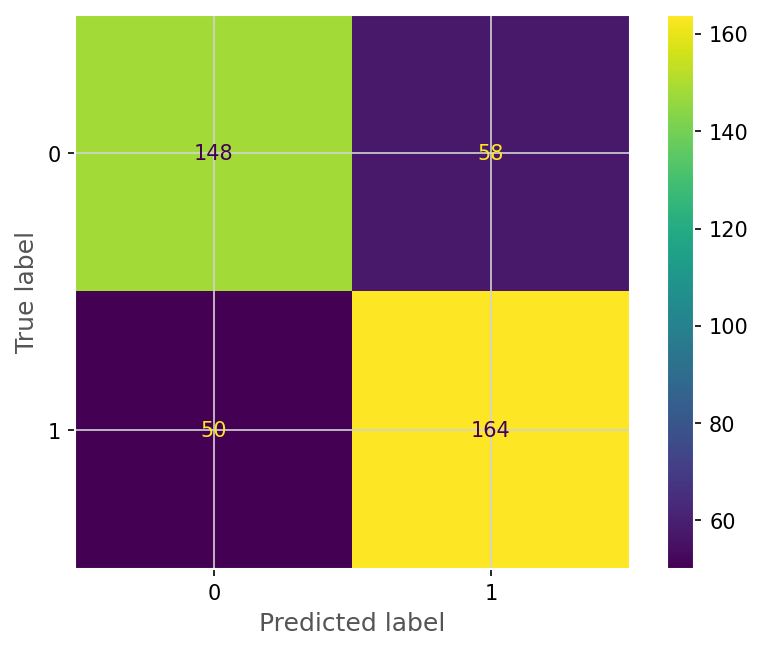

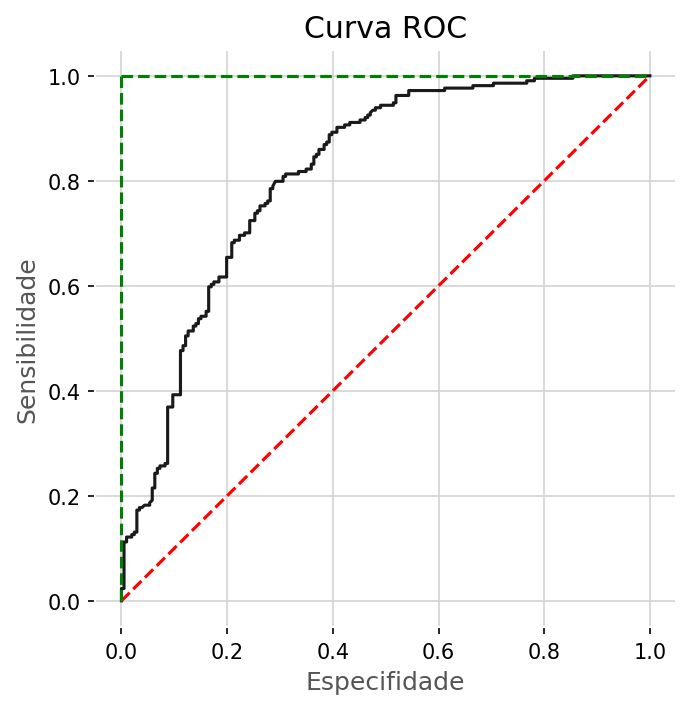

In [38]:
# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Definir a grade de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, 25, 30],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
}

# Definir o grid search com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='precision')

# Ajustar o modelo
grid_search.fit(X_treino, y_treino)

# Obter os melhores parâmetros
best_params = grid_search.best_params_

# Exibir os melhores parâmetros
print(f"Melhores parâmetros: {best_params}")

# Avaliar o modelo com os melhores parâmetros
best_model_rf = grid_search.best_estimator_
predito_rf = best_model_rf.predict(X_teste)

#matriz de confusão
cm = confusion_matrix(y_teste, predito_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#curva roc
prob_previsao = best_model_rf.predict_proba(X_teste)[:,1]
tfp, tvp, limite = roc_curve(y_teste, prob_previsao)

# Avaliando o desempenho do modelo
print(classification_report(y_teste, predito_rf))
print('roc_auc', roc_auc_score(y_teste, prob_previsao))

#plotar a curva roc
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

In [42]:
#Análise da importância das features

# Extrair a importância das características do modelo random forest
feature_importances = best_model_rf.feature_importances_

# Criar um DataFrame para facilitar a visualização
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Ordenar pelo valor da importância
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
print(feature_importances_df)

                           feature  importance
14                   faixa_duração    0.134963
15       faixa_montante_de_crédito    0.123273
4                  moradia_própria    0.112646
11             finalidade_rádio/TV    0.092393
1                         poupança    0.087181
13                     faixa_idade    0.086056
0                         trabalho    0.064799
2                   conta_corrente    0.064481
7                 finalidade_carro    0.059905
5                  moradia_alugada    0.048299
10  finalidade_móveis/equipamentos    0.042781
6               finalidade_negócio    0.033491
3                             sexo    0.025680
9              finalidade_educação    0.013964
12              finalidade_reparos    0.007662
8      finalidade_eletrodomésticos    0.002426


- Analisando a importância das features vemos que características como duração do crédito, moradia própria, montante de crédito tem um impacto bastante significativo na determinação do risco de crédito
- a finalidade do empréstimo para compra de equipamentos de radio e TV tem um impacto mais significativo em relação às demais finalidades
- outros fatores como nível de poupança e trabalho também são significativos, indicando a diversidade de fatores que influenciam o risco de crédito.

### Interpretação de métricas de desempenho e comparação dos modelos

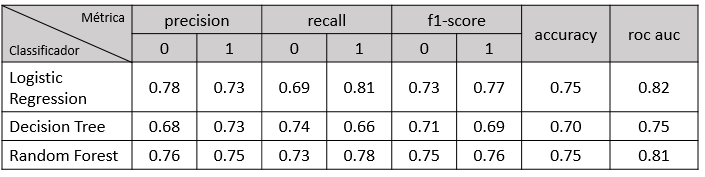

- Analisando a área sob a curva ROC (AUC), que mede a capacidade do modelo em distinguir entre bons e maus pagadores, de forma que um AUC alto (próximo de 1) indica que o modelo tem uma boa capacidade de discriminar entre as duas classe, os modelos de Regressão Logística e Random Forest apresentaram os valores mais altos em relação à essa métrica, com uma ligeira vantagem para a regressão logística, o que indica uma boa capacidade de discriminar entre as classes.

- A regressão logística possui um recall mais alto para bons pagadores (0.81), o que é importante para capturar todos os bons pagadores possíveis.

- O Random Forest apresenta um equilíbrio melhor entre precisão e recall para ambas as classes, sugerindo que ele é mais robusto em termos de identificar tanto bons quanto maus pagadores.

- Ambos os modelos têm desempenho semelhante na identificação de maus pagadores, mas o Random Forest tem uma leve vantagem em precisão, o que pode ser crucial para evitar concessões de crédito a maus pagadores.

- Com base nessas considerações recomenda-se a implementação do modelo Random Forest para melhorar a precisão na avaliação de crédito, garantindo uma gestão mais eficiente de riscos e aumentando a confiança nas decisões de concessão de crédito.

- No entanto, é sempre importante considerar os custos associados a falsos positivos e falsos negativos, e realizar testes adicionais para validar a escolha do modelo.

Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       206
           1       0.74      0.79      0.77       214

    accuracy                           0.75       420
   macro avg       0.76      0.75      0.75       420
weighted avg       0.76      0.75      0.75       420

ROC AUC: 0.8172919880228655


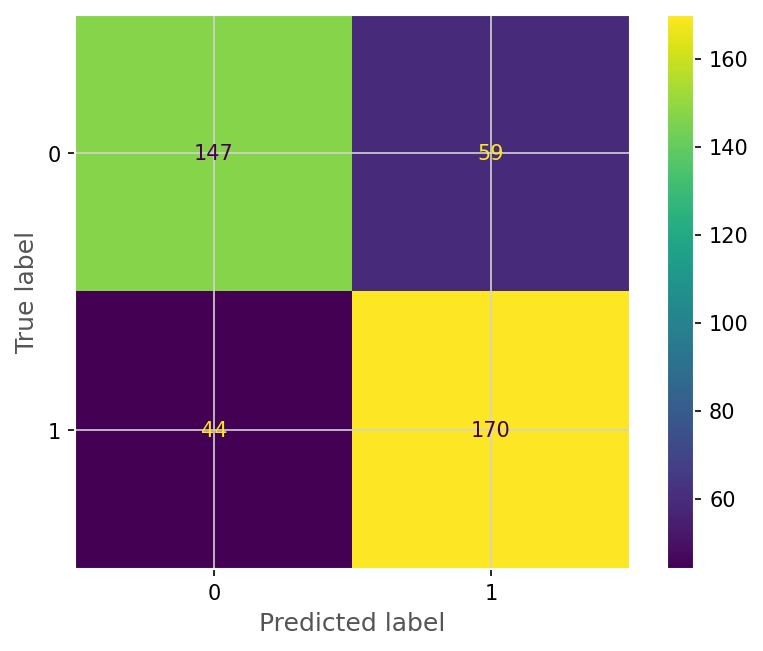

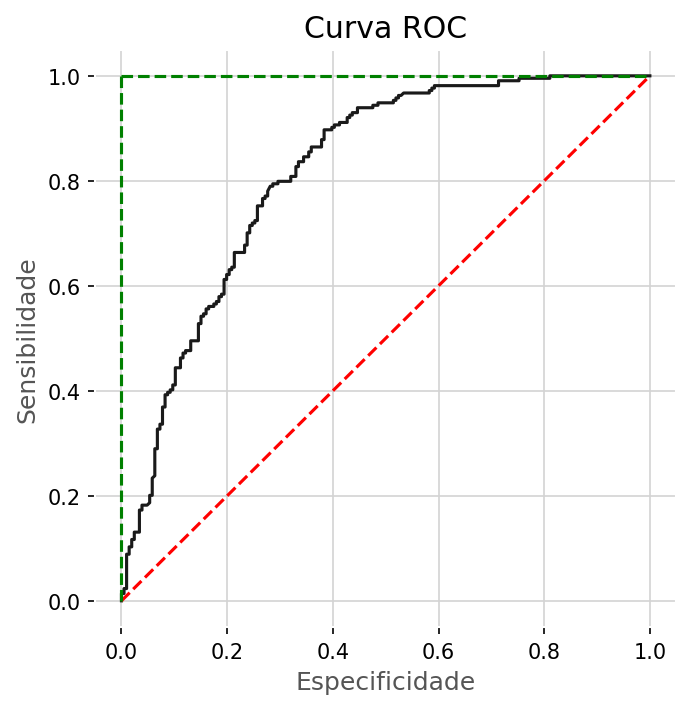

In [41]:
#aplicar a técnica de Validação Cruzada Stratified K-Fold para validar o desempenho do modelo escolhido (Random Forest) em diferentes amostras

from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir o grid search com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=stratified_kfold, scoring='precision')

# Ajustar o modelo
grid_search.fit(X_treino, y_treino)

# Obter os melhores parâmetros
best_params = grid_search.best_params_

# Exibir os melhores parâmetros
print(f"Melhores parâmetros: {best_params}")

# Avaliar o modelo com os melhores parâmetros
best_model_rf = grid_search.best_estimator_
predito_rf = best_model_rf.predict(X_teste)

# Matriz de confusão
cm = confusion_matrix(y_teste, predito_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Curva ROC
prob_previsao = best_model_rf.predict_proba(X_teste)[:, 1]
tfp, tvp, limite = roc_curve(y_teste, prob_previsao)

# Avaliando o desempenho do modelo
print(classification_report(y_teste, predito_rf))
print('ROC AUC:', roc_auc_score(y_teste, prob_previsao))

# Plotar a curva ROC
plt.subplots(1, figsize=(5, 5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c='red')  # Linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c='green'), plt.plot([1, 1], ls="--", c='green')  # Linha guia pontilhada verde
plt.show()

### Algumas limitações do Projeto

- Limitações das Variáveis: Variáveis utilizadas no modelo podem não capturar todos os aspectos relevantes do comportamento de crédito. Dados históricos podem não incluir novas tendências ou mudanças no mercado.
- Mitigação: Realizar uma análise contínua de variáveis e incorporar novas fontes de dados, como dados alternativos ou não tradicionais (por exemplo, dados de mídias sociais, comportamentais), para melhorar a capacidade preditiva do modelo.
------------------
-  Mudanças no Comportamento dos Consumidores dos consumidores ou nas condições econômicas podem afetar a relevância e a eficácia dos modelos preditivos, que podem se tornar obsoletos rapidamente.
- Mitigação: Monitorar continuamente o desempenho do modelo e realizar revisões periódicas para ajustar o modelo às novas realidades econômicas e comportamentais.
-------------------
- Limitações Regulatórias e Éticas: as práticas de análise de crédito devem estar em conformidade com leis e regulamentos que protegem os consumidores e garantem a equidade nas decisões de crédito.
- Mitigação: Manter-se atualizado sobre as leis e regulamentos relevantes, como a Lei Geral de Proteção de Dados (LGPD) no Brasil, e implementar políticas de conformidade e práticas éticas rigorosas.